# EDA WITH PYTHON PROJECT
## Topic: A general view of Greater Sydney house market over 5 years (2018 - 2023)

**INTRODUCTION**

In this analysis, we will provide insights into Sydney's property rent and sales trends over a 5-year period, including the Covid period from 2020 to 2021. This information is beneficial for individuals who are new to the Sydney market and are curious about how Sydney house prices have changed over time. We will explore whether they should buy a house in busy or rural areas and assess if their current weekly rent is high or low compared to others.

**DATASETS**

We used source datasets from FACS:

1.   Quarterly reports of house sales number & sales prices by LGAs from Mar 2018 to Jun 2023, sourced at: https://www.facs.nsw.gov.au/resources/statistics/rent-and-sales
2.   Quarterly reports of weekly rent, new lodge rental bonds and total live rental bonds by LGAs from Mar 2018 to Jun 2023, sourced at: https://www.facs.nsw.gov.au/resources/statistics/rent-and-sales

First, let's import some basic libraries used for **processing data** and **visualisation**.

In [ ]:
import pandas as pd
import datetime as dt
import calendar
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import matplotlib.dates as mdates

In [ ]:
# Define color palette for charts
colors = ['#0fb5ae', '#4046ca', '#f68511', '#de3d82', '#7e84fa', '#72e06a']
sns.color_palette(colors)

[(0.058823529411764705, 0.7098039215686275, 0.6823529411764706),
 (0.25098039215686274, 0.27450980392156865, 0.792156862745098),
 (0.9647058823529412, 0.5215686274509804, 0.06666666666666667),
 (0.8705882352941177, 0.23921568627450981, 0.5098039215686274),
 (0.49411764705882355, 0.5176470588235295, 0.9803921568627451),
 (0.4470588235294118, 0.8784313725490196, 0.41568627450980394)]

## **I. Data exploration**

As the sales and rent data are collected quarterly in many Excel files, we read all of them and merge them into one complete housing dataset.

### Explore Sales data

In [ ]:
sales_18 = pd.read_excel('/content/drive/MyDrive/Dataset_Python_Practice/sydney_house_prices/house_prices/2018/sales_march_2018.xlsx', sheet_name = 'LGA')
sales_18.head()

,Table 3. Sale Prices — NSW LGAs — March Quarter 2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,(s) 30 or less bonds lodged; (-) 10 or less b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total in the table indicates all sub-categorie...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GMR (Greater Metropolitan Region),Greater Sydney,Rings,Local Government Areas (LGAs),DwellingType,First Quartile Sales Price\n$'000s,Median Sales Price\n$'000s,Third Quartile Sales Price\n'000s,Mean Sales Price\n$'000s,Sales\nNo.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
4,Total,Total,Total,Total,Total,465,655,913,802,26046,-0.0296,0,-0.1939,-0.19


In [ ]:
sales_20 = pd.read_excel('/content/drive/MyDrive/Dataset_Python_Practice/sydney_house_prices/house_prices/2020/sales_march_2020.xlsx', sheet_name = 'LGA')
sales_20.head(6)

,Table 3. Sale Prices — NSW LGAs — March Quarter 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,(s) 30 or less properties sold; (-) 10 or less...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total in the table indicates all sub-categorie...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Read explanatory notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Greater Metropolitan Region (GMR),Greater Sydney,Rings,Local Government Area (LGA),DwellingType,First Quartile Sales Price\n$'000s,Median Sales Price\n$'000s,Third Quartile Sales Price\n'000s,Mean Sales Price\n$'000s,Sales\nNo.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count


> By reading first rows of 2 reports, we see the headers of data in all Excel files do not start at the same row number. Also, the header names among Excel files are not exactly the same (such as *Local Government Areas (LGAs)* in **sales_18** and *Local Government Area (LGA)* in **sales_20**).

The below code is to find the correct header row number of each file, and start to read the data then merge them into 1 sales dataset.

In [ ]:
# Read data from house_prices folder, each file_name has same name format as sale_<month>_year.xlsx
# Drop the first column by index because we only analyse Greater Sydney data,
# and to avoid the different column name issue when we merge data using concat (union merge).
years = range(2018, 2024)
month_strs = ['march', 'june', 'september', 'december']
month_ints = [3, 6, 9, 12]
list_data = []
for y in years:
  for m in range(0, 4):
    file = '/content/drive/MyDrive/Dataset_Python_Practice/sydney_house_prices/house_prices/' + str(y) + '/sales_' + month_strs[m] + '_'+ str(y) + '.xlsx';
    date = dt.datetime(y, month_ints[m], calendar.monthrange(y,month_ints[m])[1])
    for i in range(4,7):
      try:
        df = pd.read_excel(file, sheet_name = 'LGA', na_values = '-', header = i)
        if 'Greater Metropolitan Region' in df.columns[0]:
          df['date'] = pd.Timestamp(date)
          df = df.drop(df.columns[[0]],axis = 1)
          # Rename column (2) Local Government Areas (LGAs) to LGA because the name is different in some files
          new_name = {df.columns[2]: 'LGA'}
          df = df.rename(new_name, axis = 1)
          list_data.append(df)
      except:
        pass
master_data = pd.concat(list_data, axis = 0, join = 'outer')
master_data = master_data.reset_index(drop=True)

> In this project, the goal is to analyse house sales price across Greater Sydney based on the aggregated data from NSW Family & Community Services (FACS), therefore we only keep median sale number & median sales price for all LGAs of Greater Sydney only.

> We renamed all columns for easy readability, and then deleted unwanted columns, including "First Quartile Sales Price\n$'000s", "Third Quartile Sales Price\n'000s", "Qtly change in Median", "Annual change in Median", "Qtly change in Count" and "Annual change in Count". We filtered the data to keep LGAs that belong to Greater Sydney, specifically those within the Inner Ring, Middle Ring, and Outer Ring.


In [ ]:
master_data = master_data.drop(["First Quartile Sales Price\n$'000s",
                                "Third Quartile Sales Price\n'000s",
                                'Qtly change in Median',
                                'Annual change in Median',
                                'Qtly change in Count',
                                'Annual change in Count' ], axis = 1)
master_data.columns

Index(['Greater Sydney', 'Rings', 'LGA', 'DwellingType',
       'Median Sales Price\n$'000s', 'Mean Sales Price\n$'000s', 'Sales\nNo.',
       'date'],
      dtype='object')

In [ ]:
# Rename all columns for the easy reader
new_name = {
      'Greater Sydney': 'greatersydney'
    , 'Rings': 'rings'
    , 'LGA' : 'lga'
    , 'DwellingType': 'dwellingtype'
    , "Median Sales Price\n$'000s" : 'sales_price_median'
    , "Mean Sales Price\n$'000s" : 'sales_price_mean'
    , "Sales\nNo." : 'sales_no'
    , 'date': 'date'
}
master_data.rename(new_name, axis = 1, inplace = True)
# Let's check the columns' name after renamed
master_data.columns

Index(['greatersydney', 'rings', 'lga', 'dwellingtype', 'sales_price_median',
       'sales_price_mean', 'sales_no', 'date'],
      dtype='object')

In [ ]:
master_data.greatersydney.unique()

array(['Total', 'Greater Sydney', 'Rest of GMR', 'Rest of State'],
      dtype=object)

In [ ]:
# Filter out unwanted LGAs by only get Greater Sydney data
master_data = master_data[master_data['greatersydney'] == 'Greater Sydney']

Let's have a look at the unique values of each columns.

In [ ]:
master_data.nunique()

greatersydney            1
rings                    4
lga                     38
dwellingtype             3
sales_price_median     956
sales_price_mean      1459
sales_no              1169
date                    22
dtype: int64

In [ ]:
master_data.rings.unique()

array(['Total', 'Inner Ring', 'Middle Ring', 'Outer Ring'], dtype=object)

In [ ]:
master_data.lga.unique()

array(['Total', 'Bayside', 'Blacktown', 'Blue Mountains', 'Burwood',
       'Camden', 'Campbelltown', 'Canada Bay', 'Canterbury-Bankstown',
       'Central Coast', 'Cumberland', 'Fairfield', 'Georges River',
       'Hawkesbury', 'Hornsby', 'Hunters Hill', 'Inner West',
       'Ku-Ring-Gai', 'Lane Cove', 'Liverpool', 'Mosman', 'North Sydney',
       'Northern Beaches', 'Parramatta', 'Penrith', 'Randwick', 'Ryde',
       'Strathfield', 'Sutherland', 'Sydney City', 'The Hills',
       'Waverley', 'Willoughby', 'Wollondilly', 'Woollahra',
       'Sutherland Shire', 'Sydney', 'The Hills Shire'], dtype=object)

In [ ]:
master_data.dwellingtype.unique()

array(['Total', 'Non Strata', 'Strata'], dtype=object)

In [ ]:
master_data.date.unique()

array(['2018-03-31T00:00:00.000000000', '2018-06-30T00:00:00.000000000',
       '2018-09-30T00:00:00.000000000', '2018-12-31T00:00:00.000000000',
       '2019-03-31T00:00:00.000000000', '2019-06-30T00:00:00.000000000',
       '2019-09-30T00:00:00.000000000', '2019-12-31T00:00:00.000000000',
       '2020-03-31T00:00:00.000000000', '2020-06-30T00:00:00.000000000',
       '2020-09-30T00:00:00.000000000', '2020-12-31T00:00:00.000000000',
       '2021-03-31T00:00:00.000000000', '2021-06-30T00:00:00.000000000',
       '2021-09-30T00:00:00.000000000', '2021-12-31T00:00:00.000000000',
       '2022-03-31T00:00:00.000000000', '2022-06-30T00:00:00.000000000',
       '2022-09-30T00:00:00.000000000', '2022-12-31T00:00:00.000000000',
       '2023-03-31T00:00:00.000000000', '2023-06-30T00:00:00.000000000'],
      dtype='datetime64[ns]')

> We don't need the aggregated value aka "Total" in each column, hence, we will filter it out.

> Another issue, we found that there is inconsistent value in list of LGAs as
- "Sydney" was named as *Sydney* or *Sydney City*
- "Sutherland Shire" was named as *Sutherland* or *Sutherland Shire*
- "The Hills Shire" was named as *The Hills Shire* or *The Hills*

So we will replace those inconsistent data to have only "Sydney", "Sutherland Shire" and "The Hills Shire" values in the dataset.

In [ ]:
master_data = master_data[(master_data['rings'] != 'Total') & (master_data['lga'] != 'Total') & (master_data['dwellingtype'] != 'Total')]
master_data.nunique()

greatersydney            1
rings                    3
lga                     37
dwellingtype             2
sales_price_median     755
sales_price_mean      1067
sales_no               634
date                    22
dtype: int64

> It can be seen that the "Total" value is filtered out of the dataset (because the number of unique values of Rings & Dwelling Type decreased 1.)

In [ ]:
master_data['lga'].replace(to_replace = 'Sydney City', value = 'Sydney', inplace = True)
master_data['lga'].replace(to_replace = 'Sutherland', value = 'Sutherland Shire', inplace = True)
master_data['lga'].replace(to_replace = 'The Hills', value = 'The Hills Shire', inplace = True)

In [ ]:
# Check duplicated rows
master_data.duplicated().sum()

1495

> There are many duplicated rows because we dropped the general column 'Greater Metropolitan Region' before drilling down to its value. So we will remove all duplicate rows.

In [ ]:
master_data = master_data.drop_duplicates()
master_data.duplicated().sum()

0

Let's have a look at the dataset information.

In [ ]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495 entries, 800 to 59551
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   greatersydney       1495 non-null   object        
 1   rings               1495 non-null   object        
 2   lga                 1495 non-null   object        
 3   dwellingtype        1495 non-null   object        
 4   sales_price_median  1479 non-null   float64       
 5   sales_price_mean    1479 non-null   float64       
 6   sales_no            1479 non-null   object        
 7   date                1495 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 105.1+ KB


> We can see that our dataset includes both numerical and categorical variables. And there are also missing values in our dataset since the number of non-null values doesn't match the number of entries. It is clear that the missing values in our numerical variables including sales_price_median, sales_price_mean.

> sales_no is read as an object, therefore it contains some invalid number.

After reading the data glossary and explanatory notes from FACS, we know the root cause of missing values or invalid values due to the Differential Privacy. We are going to fix it in Data Preparation part.

### Explore Rent data

In [ ]:
# Read rent data and merge into one dataset
years = range(2018, 2024)
month_strs = ['march', 'june', 'september', 'december']
month_ints = [3, 6, 9, 12]
list_rent = []
for y in years:
  for m in range(0, 4):
    file = '/content/drive/MyDrive/Dataset_Python_Practice/sydney_house_prices/house_prices/' + str(y) + '/rent_' + month_strs[m] + '_'+ str(y) + '.xlsx';
    date = dt.datetime(y, month_ints[m], calendar.monthrange(y,month_ints[m])[1])
    for i in range(3,9):
      try:
        df = pd.read_excel(file, sheet_name = 'LGA', na_values = '-', header = i)
        if 'Greater Metropolitan Region' in df.columns[0]:
          df['date'] = pd.Timestamp(date)
          df = df.drop(df.columns[[0]],axis = 1)
          new_name = {df.columns[2]: 'lga', df.columns[4]: 'bedrooms'}
          df = df.rename(new_name, axis = 1)
          list_rent.append(df)
      except:
        pass
rent_data = pd.concat(list_rent, axis = 0, join = 'outer')
rent_data = rent_data.reset_index(drop=True)

In [ ]:
rent_data.columns

Index(['Greater Sydney', 'Rings', 'lga', 'Dwelling Types', 'bedrooms',
       'First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.', 'Quarterly change in Median Weekly Rent',
       'Annual change in Median Weekly Rent',
       'Quarterly change in New Bonds Lodged',
       'Annual change in New Bonds Lodged', 'date'],
      dtype='object')

In [ ]:
rent_data = rent_data.drop(['First Quartile Weekly Rent for New Bonds\n$'
                           , 'Third Quartile Weekly Rent for New Bonds\n$'
                           , 'Quarterly change in Median Weekly Rent'
                           , 'Annual change in Median Weekly Rent'
                           , 'Quarterly change in New Bonds Lodged'
                           , 'Annual change in New Bonds Lodged'], axis = 1)
rent_data.columns

Index(['Greater Sydney', 'Rings', 'lga', 'Dwelling Types', 'bedrooms',
       'Median Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.', 'date'],
      dtype='object')

In [ ]:
# Rename all columns for the easy reader
new_name = {
      'Greater Sydney': 'greatersydney'
    , 'Rings': 'rings'
    , 'LGA' : 'lga'
    , 'Dwelling Types': 'dwellingtype'
    , "Median Weekly Rent for New Bonds\n$" : 'wrent_median'
    , "New Bonds Lodged\nNo." : 'new_bonds_no'
    , "Total Bonds Held\nNo." : 'total_bonds_held'
    , 'date': 'date'
}
rent_data.rename(new_name, axis = 1, inplace = True)
# Let's check the columns' name after renamed
rent_data.columns

Index(['greatersydney', 'rings', 'lga', 'dwellingtype', 'bedrooms',
       'wrent_median', 'new_bonds_no', 'total_bonds_held', 'date'],
      dtype='object')

In [ ]:
rent_data.nunique()

greatersydney           4
rings                   7
lga                   141
dwellingtype            5
bedrooms                7
wrent_median          847
new_bonds_no         4639
total_bonds_held    12444
date                   22
dtype: int64

The analysis focuses on Greater Sydney, so we filter to get only Greater Sydney datapoints.

We don't need the aggregated value aka "Total" in Rings, LGA and Dwelling type; hence, we will filter it out.

We temporary ignore "bedrooms" in  the analysis, so we have not touched on this column.

In [ ]:
# Filter out unwanted LGAs by only get Greater Sydney data
rent_data = rent_data[rent_data['greatersydney'] == 'Greater Sydney']
rent_data = rent_data[(rent_data['rings'] != 'Total') & (rent_data['lga'] != 'Total') & (rent_data['dwellingtype'] != 'Total')]
rent_data.rings.unique()

array(['Inner Ring', 'Middle Ring', 'Outer Ring'], dtype=object)

In [ ]:
rent_data.dwellingtype.unique()

array(['House', 'Other', 'Townhouse', 'Flat/Unit'], dtype=object)

In [ ]:
rent_data.lga.unique()

array(['Inner West', 'Lane Cove', 'Mosman', 'North Sydney', 'Randwick',
       'Sydney City', 'Waverley', 'Woollahra', 'Bayside', 'Burwood',
       'Canada Bay', 'Canterbury-Bankstown', 'Cumberland',
       'Georges River', 'Hunters Hill', 'Ku-Ring-Gai', 'Parramatta',
       'Ryde', 'Strathfield', 'Willoughby', 'Blacktown', 'Blue Mountains',
       'Camden', 'Campbelltown', 'Central Coast', 'Fairfield',
       'Hawkesbury', 'Hornsby', 'Liverpool', 'Northern Beaches',
       'Penrith', 'Sutherland', 'The Hills', 'Wollondilly', 'Sydney',
       'Sutherland Shire', 'The Hills Shire'], dtype=object)

> Another issue, we found that there is inconsistent value in list of LGAs as
- "Sydney" was named as Sydney or Sydney City
- "Sutherland Shire" was named as Sutherland or Sutherland Shire.
- "The Hills Shire" was named as The Hills or The Hills Shire.

So we will replace all Sydney City values by Sydney, and Sutherland values by Sydney, Sutherland Shire and The Hills Shire in the dataset.

In [ ]:
rent_data['lga'].replace(to_replace = 'Sydney City', value = 'Sydney', inplace = True)
rent_data['lga'].replace(to_replace = 'Sutherland', value = 'Sutherland Shire', inplace = True)
rent_data['lga'].replace(to_replace = 'The Hills', value = 'The Hills Shire', inplace = True)
rent_data.lga.unique()

<ipython-input-29-dc777797acdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_data['lga'].replace(to_replace = 'Sydney City', value = 'Sydney', inplace = True)
<ipython-input-29-dc777797acdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_data['lga'].replace(to_replace = 'Sutherland', value = 'Sutherland Shire', inplace = True)
<ipython-input-29-dc777797acdf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_data['lg

array(['Inner West', 'Lane Cove', 'Mosman', 'North Sydney', 'Randwick',
       'Sydney', 'Waverley', 'Woollahra', 'Bayside', 'Burwood',
       'Canada Bay', 'Canterbury-Bankstown', 'Cumberland',
       'Georges River', 'Hunters Hill', 'Ku-Ring-Gai', 'Parramatta',
       'Ryde', 'Strathfield', 'Willoughby', 'Blacktown', 'Blue Mountains',
       'Camden', 'Campbelltown', 'Central Coast', 'Fairfield',
       'Hawkesbury', 'Hornsby', 'Liverpool', 'Northern Beaches',
       'Penrith', 'Sutherland Shire', 'The Hills Shire', 'Wollondilly'],
      dtype=object)

In [ ]:
rent_data.lga.nunique()

34

In [ ]:
# Check duplicated rows
rent_data.duplicated().sum()

20603

In [ ]:
rent_data = rent_data.drop_duplicates()
rent_data.duplicated().sum()

0

Let's have a look at the rent dataset information.

In [ ]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20604 entries, 9451 to 704064
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   greatersydney     20604 non-null  object        
 1   rings             20604 non-null  object        
 2   lga               20604 non-null  object        
 3   dwellingtype      20604 non-null  object        
 4   bedrooms          20604 non-null  object        
 5   wrent_median      11637 non-null  float64       
 6   new_bonds_no      11637 non-null  object        
 7   total_bonds_held  18719 non-null  object        
 8   date              20604 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 1.6+ MB


> We can see that our dataset includes both numerical and categorical variables. And there are also missing values in our dataset since the number of non-null values doesn't match the number of entries. It is clear that the missing values in our numerical variables including wrent_median, new_bonds_no, total_bonds_held.

> new_bonds_no, total_bonds_held are read as an object, therefore it contains some invalid number.

After reading the data glossary and explanatory notes from FACS, we know the root cause of missing values or invalid values due to the Differential Privacy.

These missing values also declared by FACS due to the Differential Privacy.

## **II. Data preparation**

In this section, we will prepare the data to better explore the correlation between sales and rent data.

What we will do in this section includes:

- Replacing missing or invalid values in both datasets.
- Merging the two datasets and removing redundant attributes (columns).
- Exploring the merged dataset once more.

### **Sales Data preparation**

In [ ]:
master_data = master_data['sales_no'].astype(float)

ValueError: could not convert string to float: 's'

> When convert sales_no to float, we found error "could not convert string to float: 's', so it proves that there is "s" value in sales_no.

We are going to fix the invalid data according to the Explanatory Note registered by FACS.

In [ ]:
# Replace s in sales_no by 20 as sales_no between 10 and 30 are shown by an ‘s’ according to https://www.facs.nsw.gov.au/resources/statistics/rent-and-sales/dashboard/explanatory-notes
master_data['sales_no'].replace(to_replace = 's', value = 20, inplace = True)
master_data['sales_no'] = master_data.sales_no.astype(float)

In [ ]:
# Fill null sales_no with 5 because the sales_no was not reported if it is 10 or less according to https://www.facs.nsw.gov.au/resources/statistics/rent-and-sales/dashboard/explanatory-notes
master_data.sales_no.fillna(5, inplace = True)

In [ ]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495 entries, 800 to 59551
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   greatersydney       1495 non-null   object        
 1   rings               1495 non-null   object        
 2   lga                 1495 non-null   object        
 3   dwellingtype        1495 non-null   object        
 4   sales_price_median  1479 non-null   float64       
 5   sales_price_mean    1479 non-null   float64       
 6   sales_no            1495 non-null   float64       
 7   date                1495 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 105.1+ KB


> In this project, we have not used sales_price_mean so let's ignore it during the data preparation process.

> There are 16 missing values in sales_price_median. Let's go to check them.

In [ ]:
null_condition = master_data.isnull().any(axis = 1)
null_rows = master_data[null_condition]
null_rows

,greatersydney,rings,lga,dwellingtype,sales_price_median,sales_price_mean,sales_no,date
3691,Greater Sydney,Outer Ring,Wollondilly,Strata,NaN,NaN,5.0,2018-06-30
6452,Greater Sydney,Outer Ring,Blue Mountains,Strata,NaN,NaN,5.0,2018-09-30
6488,Greater Sydney,Outer Ring,Wollondilly,Strata,NaN,NaN,5.0,2018-09-30
9267,Greater Sydney,Outer Ring,Wollondilly,Strata,NaN,NaN,5.0,2018-12-31
12038,Greater Sydney,Outer Ring,Wollondilly,Strata,NaN,NaN,5.0,2019-03-31
17536,Greater Sydney,Outer Ring,Wollondilly,Strata,NaN,NaN,5.0,2019-09-30
20305,Greater Sydney,Outer Ring,Wollondilly,Strata,NaN,NaN,5.0,2019-12-31
23084,Greater Sydney,Outer Ring,Wollondilly,Strata,NaN,NaN,5.0,2020-03-31
25835,Greater Sydney,Outer Ring,Wollondilly,Strata,NaN,NaN,5.0,2020-06-30
28590,Greater Sydney,Outer Ring,Wollondilly,Strata,NaN,NaN,5.0,2020-09-30


> The missing values belong to Outer Ring and have dwelling type Strata.

Let's calculate the median sales price of Outer Ring and dwelling type Strata for each quarter, then fill to missing values of corressponding records.

In [ ]:
# Calculate median sales price for each couple ring & dwellingtype by date, then filter to get only values of Outer Ring & Strata
value_to_cal = {'sales_price_median' : 'median'}
price_median_by_rings_dwellingtype = master_data.groupby(['date', 'rings', 'dwellingtype']).agg(value_to_cal).reset_index()
price_median_by_rings_dwellingtype = price_median_by_rings_dwellingtype[(price_median_by_rings_dwellingtype['rings'] == 'Outer Ring') & (price_median_by_rings_dwellingtype['dwellingtype'] == 'Strata')]

In [ ]:
# Create a dict of date & value and fill for each null row
date_col = price_median_by_rings_dwellingtype['date']
sales_col = price_median_by_rings_dwellingtype['sales_price_median']
median_sales_dict = dict(zip(date_col, sales_col))
for index, row in master_data[master_data.isnull().any(axis = 1)].iterrows():
  master_data.at[index, 'sales_price_median'] = median_sales_dict[row['date']]

In [ ]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495 entries, 800 to 59551
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   greatersydney       1495 non-null   object        
 1   rings               1495 non-null   object        
 2   lga                 1495 non-null   object        
 3   dwellingtype        1495 non-null   object        
 4   sales_price_median  1495 non-null   float64       
 5   sales_price_mean    1479 non-null   float64       
 6   sales_no            1495 non-null   float64       
 7   date                1495 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 137.4+ KB


> We can see that sales_price_median and sales_no are filled missing values and corrected data type.

In [ ]:
# Write master_data (sales data) into csv file and store it for backup
filepath = pathlib.Path('/content/drive/MyDrive/Dataset_Python_Practice/sydney_house_prices/house_prices/sales_data.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
master_data.to_csv(filepath)

### **Rent Data preparation**

We continue to do the same prepration process for rent data

In [ ]:
# Replace s in sales_no by 20 as sales_no between 10 and 30 are shown by an ‘s’ according to https://www.facs.nsw.gov.au/resources/statistics/rent-and-sales/dashboard/explanatory-notes
# Fill null sales_no with 5 because the sales_no was not reported if it is 10 or less
rent_data['new_bonds_no'].replace(to_replace = 's', value = 20, inplace = True)
rent_data['new_bonds_no'].fillna(5, inplace = True)
rent_data['new_bonds_no'] = rent_data.new_bonds_no.astype(float)

ValueError: could not convert string to float: '1,396'

> Hence, we can see that some value on new_bonds_no are invalid. We will remove character ',' in those values and convert all values to float.

In [ ]:
for i in range(0, pd.Series(rent_data['new_bonds_no']).size):
  rent_data.new_bonds_no.iloc[i] = str(rent_data.new_bonds_no.iloc[i])
  if ',' in rent_data.new_bonds_no.iloc[i]:
    rent_data.new_bonds_no.iloc[i] = rent_data.new_bonds_no.iloc[i].replace(',','')
rent_data['new_bonds_no'] = rent_data.new_bonds_no.astype(float)

<ipython-input-44-3f51bc2557c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_data.new_bonds_no.iloc[i] = str(rent_data.new_bonds_no.iloc[i])
<ipython-input-44-3f51bc2557c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_data.new_bonds_no.iloc[i] = rent_data.new_bonds_no.iloc[i].replace(',','')


In [ ]:
# Continue to do the same process for "total bonds held"
rent_data['total_bonds_held'].replace(to_replace = 's', value = 20, inplace = True)
rent_data['total_bonds_held'].fillna(5, inplace = True)
rent_data['total_bonds_held'] = rent_data.total_bonds_held.astype(float)

ValueError: could not convert string to float: '9,444'

In [ ]:
# Fix invalid values in total_bonds_held before converting to float
for i in range(0, pd.Series(rent_data['total_bonds_held']).size):
  rent_data.total_bonds_held.iloc[i] = str(rent_data.total_bonds_held.iloc[i])
  if ',' in rent_data.total_bonds_held.iloc[i]:
    rent_data.total_bonds_held.iloc[i] = rent_data.total_bonds_held.iloc[i].replace(',','')
rent_data['total_bonds_held'] = rent_data.total_bonds_held.astype(float)

<ipython-input-46-c1895fb38ff7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_data.total_bonds_held.iloc[i] = str(rent_data.total_bonds_held.iloc[i])
<ipython-input-46-c1895fb38ff7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_data.total_bonds_held.iloc[i] = rent_data.total_bonds_held.iloc[i].replace(',','')


In [ ]:
# Set index to make sure the row start from 0 and there is not any rows that have the same index (this case happened because we union joined many datasets after reading csv files with the same index)
rent_data.index = range(0, len(rent_data))
rent_data.head()

,greatersydney,rings,lga,dwellingtype,bedrooms,wrent_median,new_bonds_no,total_bonds_held,date
0,Greater Sydney,Inner Ring,Inner West,House,Total,780.0,779.0,5504.0,2018-03-31
1,Greater Sydney,Inner Ring,Inner West,House,Bedsitter,NaN,5.0,20.0,2018-03-31
2,Greater Sydney,Inner Ring,Inner West,House,1 Bedroom,520.0,57.0,245.0,2018-03-31
3,Greater Sydney,Inner Ring,Inner West,House,Not Specified,NaN,5.0,317.0,2018-03-31
4,Greater Sydney,Inner Ring,Inner West,House,2 Bedrooms,700.0,284.0,1812.0,2018-03-31


In [ ]:
print(rent_data.dwellingtype.unique())
print(rent_data.bedrooms.unique())

['House' 'Other' 'Townhouse' 'Flat/Unit']
['Total' 'Bedsitter' '1 Bedroom' 'Not Specified' '2 Bedrooms' '3 Bedrooms'
 '4 or more Bedrooms']


> Because we are going to merge rent data and sales data, therefore we will create a general dwelling type value based on the assumption that:
- House is Non Strata
- Other, Townhouse, Flat/Unit is Strata.

For the bedrooms value, it has both Total and detailed values. In the scope of this analysis, we will analyse at a general level that only focuses on dwelling types and will not drill down to bedroom details. Hence, we will filter out those detailed values and then delete the bedrooms column because it only has one "Total" value.

In [ ]:
# Add a new column dwellingtype_g to categories dwelling type into 2 groups Strata & Non Strata only
rent_data['dwellingtype_g'] = None
for index, row in rent_data.iterrows():
  if rent_data.at[index, 'dwellingtype'] == 'House':
    rent_data.at[index, 'dwellingtype_g'] = 'Non Strata'
  else:
    rent_data.at[index, 'dwellingtype_g'] = 'Strata'
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20604 entries, 0 to 20603
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   greatersydney     20604 non-null  object        
 1   rings             20604 non-null  object        
 2   lga               20604 non-null  object        
 3   dwellingtype      20604 non-null  object        
 4   bedrooms          20604 non-null  object        
 5   wrent_median      11637 non-null  float64       
 6   new_bonds_no      20604 non-null  float64       
 7   total_bonds_held  20604 non-null  float64       
 8   date              20604 non-null  datetime64[ns]
 9   dwellingtype_g    20604 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 1.6+ MB


In [ ]:
rent_data = rent_data[rent_data['bedrooms'] == 'Total']
rent_data.head(5)

,greatersydney,rings,lga,dwellingtype,bedrooms,wrent_median,new_bonds_no,total_bonds_held,date,dwellingtype_g
0,Greater Sydney,Inner Ring,Inner West,House,Total,780.0,779.0,5504.0,2018-03-31,Non Strata
7,Greater Sydney,Inner Ring,Inner West,Other,Total,497.5,240.0,5135.0,2018-03-31,Strata
14,Greater Sydney,Inner Ring,Inner West,Townhouse,Total,750.0,231.0,2672.0,2018-03-31,Strata
21,Greater Sydney,Inner Ring,Inner West,Flat/Unit,Total,515.0,1701.0,16217.0,2018-03-31,Strata
28,Greater Sydney,Inner Ring,Lane Cove,House,Total,975.0,95.0,658.0,2018-03-31,Non Strata


In [ ]:
# Delete bedrooms column
rent_data = rent_data.drop(columns = ['bedrooms'], axis = 1)
rent_data.columns

Index(['greatersydney', 'rings', 'lga', 'dwellingtype', 'wrent_median',
       'new_bonds_no', 'total_bonds_held', 'date', 'dwellingtype_g'],
      dtype='object')

In [ ]:
# Check missing values
missing_values = rent_data[(rent_data.isnull().any(axis = 1))]
print("Missing values belong to Rings: " , missing_values.rings.unique())
print("Missing values belong to dwelling types: " , missing_values.dwellingtype.unique())
print("Missing values belong to quarters: " , missing_values.date.unique())

Missing values belong to Rings:  ['Middle Ring' 'Outer Ring' 'Inner Ring']
Missing values belong to dwelling types:  ['Other' 'Townhouse']
Missing values belong to quarters:  ['2018-03-31T00:00:00.000000000' '2018-06-30T00:00:00.000000000'
 '2018-09-30T00:00:00.000000000' '2018-12-31T00:00:00.000000000'
 '2019-03-31T00:00:00.000000000' '2019-06-30T00:00:00.000000000'
 '2019-09-30T00:00:00.000000000' '2019-12-31T00:00:00.000000000'
 '2020-03-31T00:00:00.000000000' '2020-06-30T00:00:00.000000000'
 '2020-09-30T00:00:00.000000000' '2020-12-31T00:00:00.000000000'
 '2021-03-31T00:00:00.000000000' '2021-06-30T00:00:00.000000000'
 '2021-09-30T00:00:00.000000000' '2021-12-31T00:00:00.000000000'
 '2022-03-31T00:00:00.000000000' '2022-06-30T00:00:00.000000000'
 '2022-09-30T00:00:00.000000000' '2022-12-31T00:00:00.000000000'
 '2023-03-31T00:00:00.000000000' '2023-06-30T00:00:00.000000000']


> The missing values belong to all Rings and have dwelling type Other or Townhouse.

Let's calculate the weekly median rent of all Rings and dwelling type Other/Townhouse for each quarter, then fill to missing values of corressponding records.

In [ ]:
wrent_median_by_ring_dwellingtype = rent_data[rent_data['dwellingtype'].isin(['Townhouse', 'Other'])].groupby(['date', 'rings', 'dwellingtype']).wrent_median.median().reset_index()
wrent_median_by_ring_dwellingtype[wrent_median_by_ring_dwellingtype['rings'] == 'Inner Ring'].head(5)

,date,rings,dwellingtype,wrent_median
0,2018-03-31,Inner Ring,Other,575.00
1,2018-03-31,Inner Ring,Townhouse,900.00
6,2018-06-30,Inner Ring,Other,588.75
7,2018-06-30,Inner Ring,Townhouse,912.50
12,2018-09-30,Inner Ring,Other,558.75


In [ ]:
# Create a dict of date & value and fill for each null row
rent_data = rent_data.reset_index(drop=True)  # reset_index to make every row has a unique index because we will iterrow by index
def change_func(wrent_median_by_ring_dwellingtype, ringvalue, dwellingvalue):
  date_col = wrent_median_by_ring_dwellingtype['date']
  rent_col = wrent_median_by_ring_dwellingtype['wrent_median']
  median_rent_dict = dict(zip(date_col, rent_col))
  global rent_data
  for index, row in rent_data[(rent_data.isnull().any(axis = 1)) & (rent_data['dwellingtype'] == dwellingvalue) & (rent_data['rings'] == ringvalue)].iterrows():
    rent_data.at[index, 'wrent_median'] = median_rent_dict[row['date']]

# Change for rings & dwellingtypes
rings = missing_values.rings.unique()
dwellings = missing_values.dwellingtype.unique()
for x in rings:
  for y in dwellings:
    sub_wrent_median_by_ring_dwellingtype = wrent_median_by_ring_dwellingtype[(wrent_median_by_ring_dwellingtype['rings'] == x) & (wrent_median_by_ring_dwellingtype['dwellingtype'] == y)]
    change_func(sub_wrent_median_by_ring_dwellingtype, x, y)

In [ ]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   greatersydney     2992 non-null   object        
 1   rings             2992 non-null   object        
 2   lga               2992 non-null   object        
 3   dwellingtype      2992 non-null   object        
 4   wrent_median      2992 non-null   float64       
 5   new_bonds_no      2992 non-null   float64       
 6   total_bonds_held  2992 non-null   float64       
 7   date              2992 non-null   datetime64[ns]
 8   dwellingtype_g    2992 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 210.5+ KB


In [ ]:
# Write rent_data into csv file and store it for backup
filepath = pathlib.Path('/content/drive/MyDrive/Dataset_Python_Practice/sydney_house_prices/house_prices/rent_data.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
rent_data.to_csv(filepath)

### **Final dataset combination**

Now we have both master_data for sales and rent_data for rent cleaned and transformed.
We are going to merge them to have one dataset only.

In [ ]:
final_data = master_data.merge(rent_data, how = 'outer', left_on = ['date', 'lga', 'dwellingtype'], right_on = ['date', 'lga', 'dwellingtype_g'] )

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2992 entries, 0 to 2991
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   greatersydney_x     2989 non-null   object        
 1   rings_x             2989 non-null   object        
 2   lga                 2992 non-null   object        
 3   dwellingtype_x      2989 non-null   object        
 4   sales_price_median  2989 non-null   float64       
 5   sales_price_mean    2941 non-null   float64       
 6   sales_no            2989 non-null   float64       
 7   date                2992 non-null   datetime64[ns]
 8   greatersydney_y     2992 non-null   object        
 9   rings_y             2992 non-null   object        
 10  dwellingtype_y      2992 non-null   object        
 11  wrent_median        2992 non-null   float64       
 12  new_bonds_no        2992 non-null   float64       
 13  total_bonds_held    2992 non-null   float64     

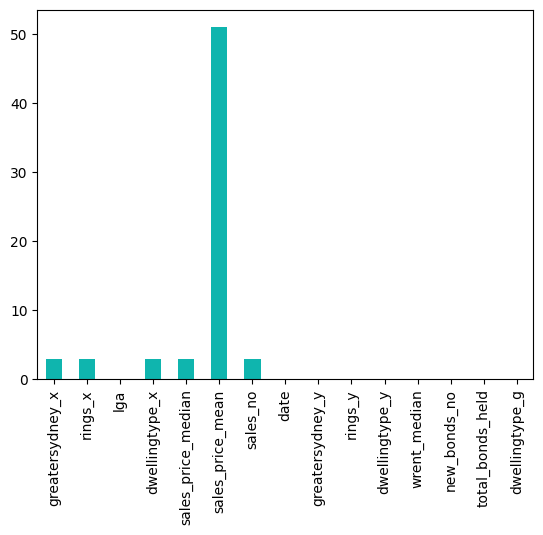

In [ ]:
final_data.isnull().sum().plot.bar(color = colors[0])
plt.show()

> We haven't cleaned missing values in sales_prices_mean above, therefore why they are so many missing values. However, in this analysis, we haven't used it.

Let's check the missing values in the other columns.

In [ ]:
columns_to_check = final_data.columns.difference(['sales_price_mean'])
final_data[final_data[columns_to_check].isnull().any(axis=1)].groupby(['date', 'lga', 'dwellingtype_g']).count()

,,,greatersydney_x,rings_x,dwellingtype_x,sales_price_median,sales_price_mean,sales_no,greatersydney_y,rings_y,dwellingtype_y,wrent_median,new_bonds_no,total_bonds_held
date,lga,dwellingtype_g,,,,,,,,,,,,
2019-06-30,Wollondilly,Strata,0,0,0,0,0,0,3,3,3,3,3,3


> The missing values belong to LGA Wollondilly at June 2019 report. We checked the original datasource and confirmed that there is no value reported for this LGA. Therefore, we assume that there is no sales for this LGA in June 2019 report.

Hence, we will change the median sales price by the previous median sales price (March 2019)

> We do not care the sales_price_mean, so let's ignore it.

In [ ]:
final_data['sales_no'].fillna(0, inplace = True)
final_data['sales_price_median'].fillna(final_data[(final_data['lga'] == 'Wollondilly') & (final_data['date'] == '2019-03-31') & (final_data['dwellingtype_g'] == 'Strata')].groupby(['lga']).sales_price_median.median().iloc[0], inplace=True)

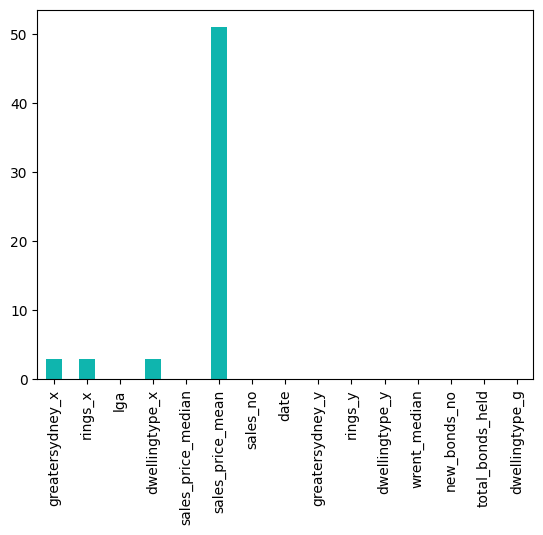

In [ ]:
final_data.isnull().sum().plot.bar(color = colors[0])
plt.show()

> Because we merged on dwelling type and ring, therefore we ca use dwellingtype_y and ring_y, so we do not need to fill missing values in dwellingtype_x and ring_x, and we will drop them from the dataset.

In [ ]:
# Drop some duplicated columns after merged
final_data.drop(columns = ['greatersydney_x', 'rings_x', 'dwellingtype_x'], inplace=True)
final_data.columns

Index(['lga', 'sales_price_median', 'sales_price_mean', 'sales_no', 'date',
       'greatersydney_y', 'rings_y', 'dwellingtype_y', 'wrent_median',
       'new_bonds_no', 'total_bonds_held', 'dwellingtype_g'],
      dtype='object')

In [ ]:
# Write the final data to csv file and store it for backup
filepath = pathlib.Path('/content/drive/MyDrive/Dataset_Python_Practice/sydney_house_prices/house_prices/final_data_fillna.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
final_data.to_csv(filepath)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2992 entries, 0 to 2991
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   lga                 2992 non-null   object        
 1   sales_price_median  2992 non-null   float64       
 2   sales_price_mean    2941 non-null   float64       
 3   sales_no            2992 non-null   float64       
 4   date                2992 non-null   datetime64[ns]
 5   greatersydney_y     2992 non-null   object        
 6   rings_y             2992 non-null   object        
 7   dwellingtype_y      2992 non-null   object        
 8   wrent_median        2992 non-null   float64       
 9   new_bonds_no        2992 non-null   float64       
 10  total_bonds_held    2992 non-null   float64       
 11  dwellingtype_g      2992 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 303.9+ KB


> Our dataset has 2992 datapoints, including
- Categorial features: lga, greater sydney, rings, dwelling type (Flat/Unit, Townhouse, House, Other), dwelling type general (Non Strata, Strata).
- Numerical features: sales price median, sales number, weekly rent median, new logde rental bonds, total live rental bonds
- Date feature

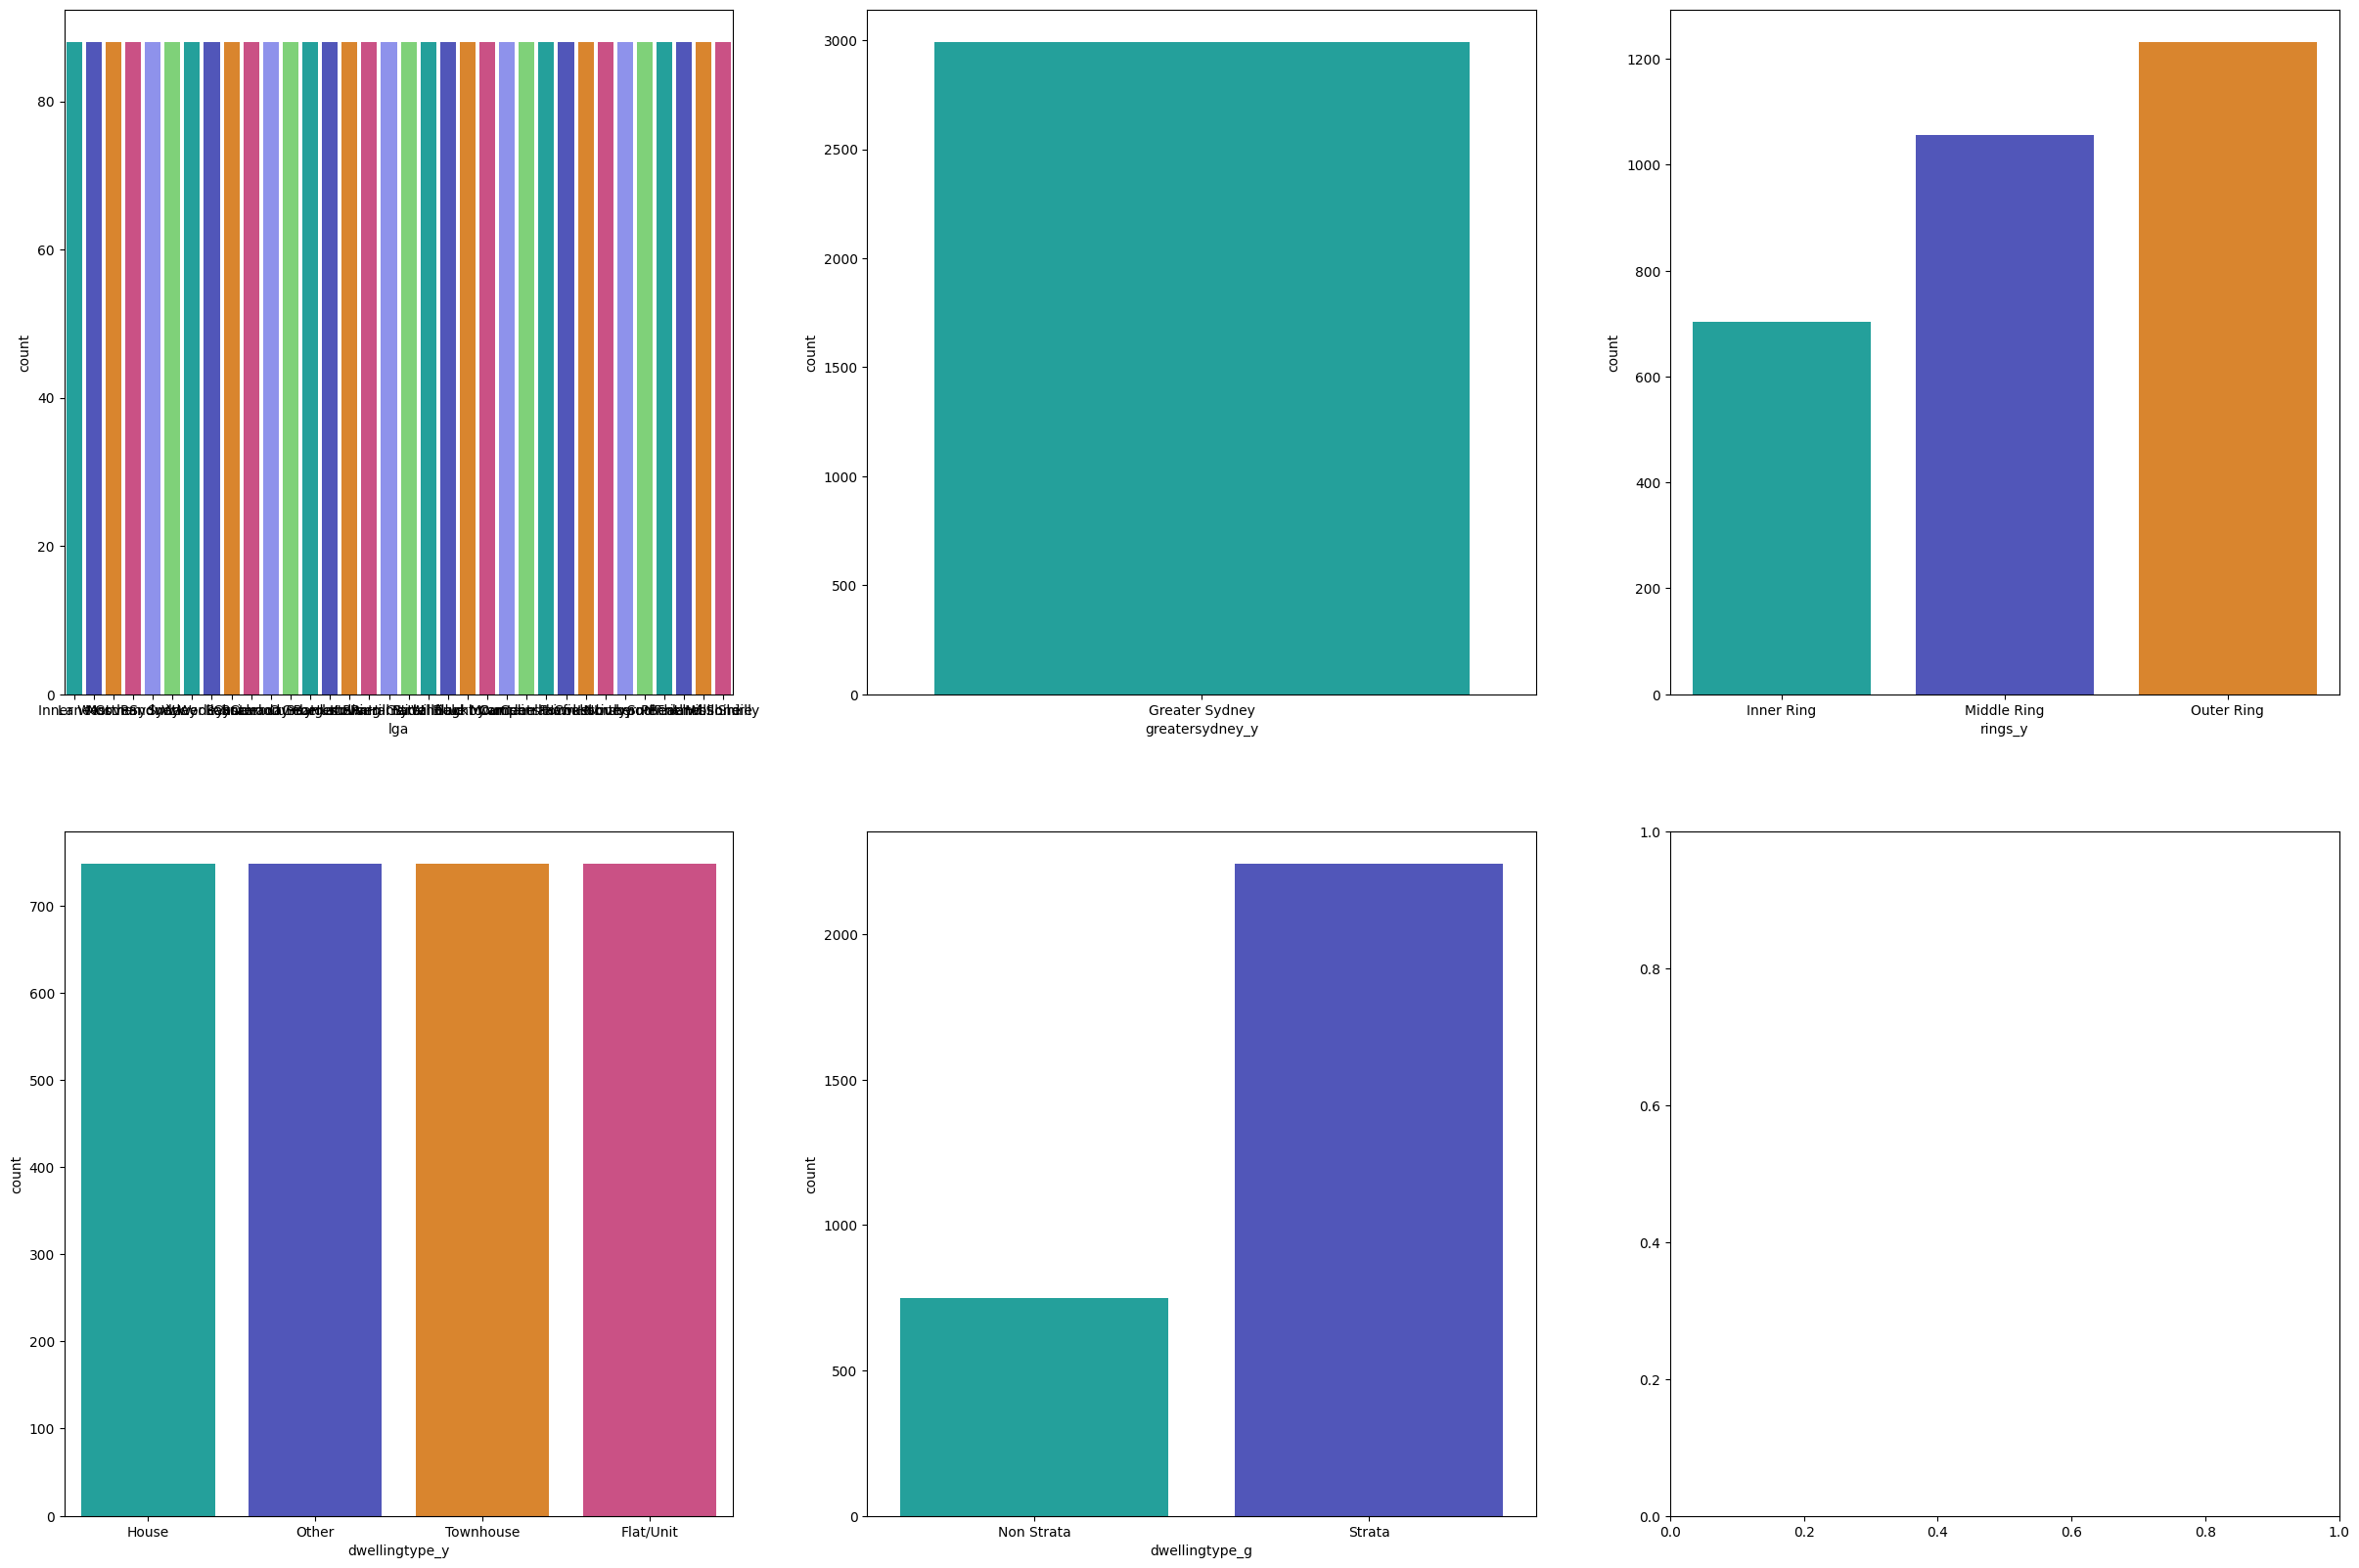

In [ ]:
# List of categorical features
categorical = [i for i in final_data.columns if final_data[i].dtypes == 'object']
f,ax = plt.subplots(2 ,3 , figsize=(30,20))
for i, ax in zip(categorical, ax.reshape(-1)):
  sns.countplot(x=i, data=final_data, ax=ax, palette = colors)
plt.show()

> The number of datapoints for these features is roughly the same, meaning this dataset records complete data for each feature.
- The number of Strata datapoints is three times greater than those in Non Strata because Strata includes Townhouse, Unit/Flat, and Other, while Non Strata only represents houses.
- The Inner Ring has the fewest LGAs, followed by the Middle Ring, and the Outer Ring has the most LGAs.


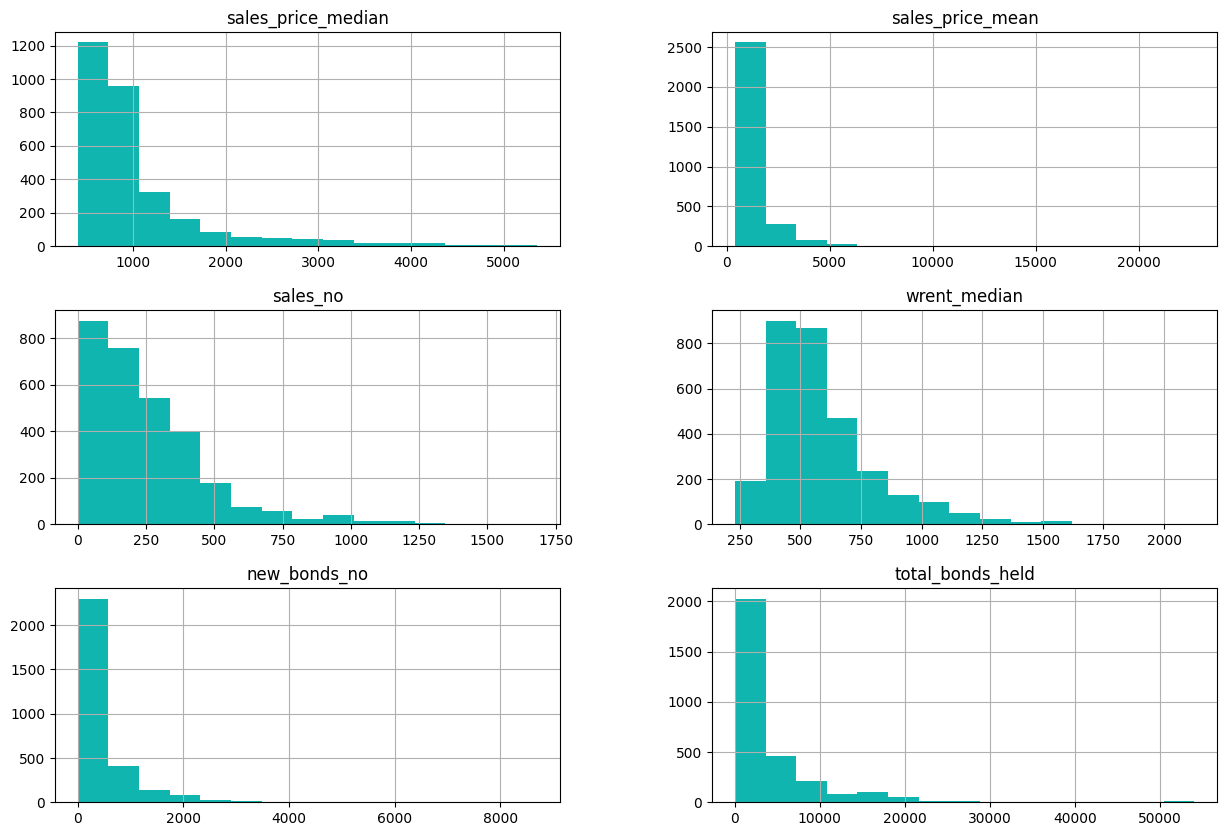

In [ ]:
# List of numerical variables
numerical = [i for i in final_data.columns if final_data[i].dtypes == 'float64']
final_data[numerical].hist(bins=15, figsize = (15,10), color = colors[0])
plt.show()

> Most data has skewed on the right, meaning most data is lower than than average value, it means we don't have many exceed values in sales volume, sales price, weekly rent, new bonds number and total bonds number.

Let's have a look at some statistics of the dataset

In [ ]:
final_data[numerical].describe()

,sales_price_median,sales_price_mean,sales_no,wrent_median,new_bonds_no,total_bonds_held
count,2992.000000,2941.000000,2992.000000,2992.000000,2992.000000,2992.000000
mean,1042.398396,1202.639918,252.867313,591.007029,424.916778,4205.890040
std,718.997882,1207.352903,223.374018,222.582591,727.039003,6037.619938
min,404.000000,403.000000,0.000000,230.000000,5.000000,42.000000
25%,630.000000,659.000000,97.750000,440.000000,52.000000,746.500000
50%,805.000000,901.000000,198.000000,540.000000,168.000000,2187.500000
75%,1120.000000,1269.000000,350.000000,670.000000,540.250000,5001.000000
max,5363.000000,22698.000000,1683.000000,2125.000000,8703.000000,54047.000000


> This data has a wide range; for example, the sales price ranges from 404K to 5363K, and the weekly rent ranges from 230 to 2125. This variation is due to many changes over the five years. We will go deeper into the trends in the analysis later.

<ipython-input-70-385e41313564>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = sns.heatmap(final_data.corr(), linewidths = .5, cmap="YlGnBu", annot=True, ax=ax, fmt='.1g')


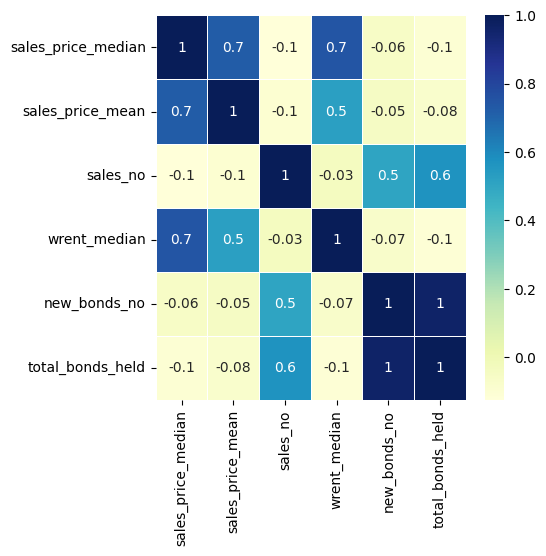

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
cm = sns.heatmap(final_data.corr(), linewidths = .5, cmap="YlGnBu", annot=True, ax=ax, fmt='.1g')

> We can see that sales price and weekly rent have a correlation, as well as sales no and total bonds no. We will examine these correlations in the below analysis.

<ipython-input-71-8a0a9eb49322>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = sns.heatmap(final_data.corr(), linewidths = .5, cmap="YlGnBu", annot=True, ax=ax, fmt='.1g')


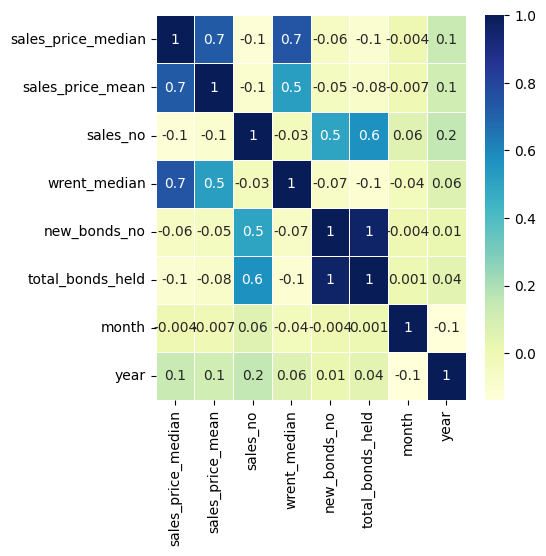

In [ ]:
final_data['month'] = final_data['date'].dt.month
final_data['year'] = final_data['date'].dt.year
fig, ax = plt.subplots(figsize=(5,5))
cm = sns.heatmap(final_data.corr(), linewidths = .5, cmap="YlGnBu", annot=True, ax=ax, fmt='.1g')

> There is no relation between date or year with other features.

## **III. Findings & Insights**

### **Sales**

First, we look at sales number of Greater Sydney for 5 years.

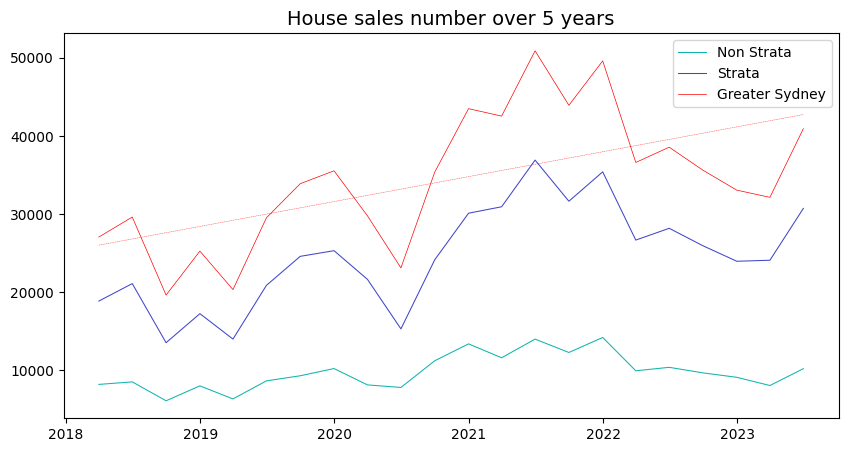

In [ ]:
# Line chart of sales volume by dwelling types.
sales_dwtype = final_data.groupby(['date', 'year', 'dwellingtype_g']).sales_no.sum().reset_index()
sales_syd = final_data.groupby(['date', 'year']).sales_no.sum().reset_index()

# draw line chart
i = 0
f,ax = plt.subplots(figsize=(10,5))
for dwtype in sales_dwtype['dwellingtype_g'].unique():
  sales = sales_dwtype[sales_dwtype['dwellingtype_g'] == dwtype]
  plt.plot('date', 'sales_no', data = sales, marker='', color=colors[i], linewidth=0.75, label = dwtype)
  i = i+1
plt.plot('date', 'sales_no', data = sales_syd, marker='', color='red', linewidth=0.5, label = 'Greater Sydney')

# add regression line
sales_syd['date2'] = sales_syd['date']
sales_syd['date2'] =  mdates.date2num(sales_syd['date2']) #convert date to numeric
coefficients_sydney = np.polyfit(sales_syd['date2'], sales_syd['sales_no'], 1)
p_sydney = np.poly1d(coefficients_sydney)
plt.plot(sales_syd['date2'], p_sydney(sales_syd['date2']), color = 'red', linestyle='dashed', linewidth = '0.25')


# show graph
plt.legend()
plt.title("House sales number over 5 years", fontsize=14)
plt.show()

> We can see that the number of sales had 3 gaps
- In Mar 2019: the first Covid wave hit NSW.
- In June 2020: the second wave of Covid hit NSW.
- In Mar 2022:

Comparing 2 post-Covid periods, there is a notable surge in home buying until the end of 2022, indicating reduced fear about Covid-related uncertainties. Strata houses has not shown any significant growth in sales volume, especially when Covid came back, adjacent houses are not considered potential during such time. Present data suggests both Strata and Non Strata properties are currently trending at a similar pace.

Relating to the gap in Mar 2022, we know that the interest rate, raised in May 2022, potentially impacted the number of sales, with rumors circulating about the increase starting in early 2022.

Now let's look at the median sales price for 5 years

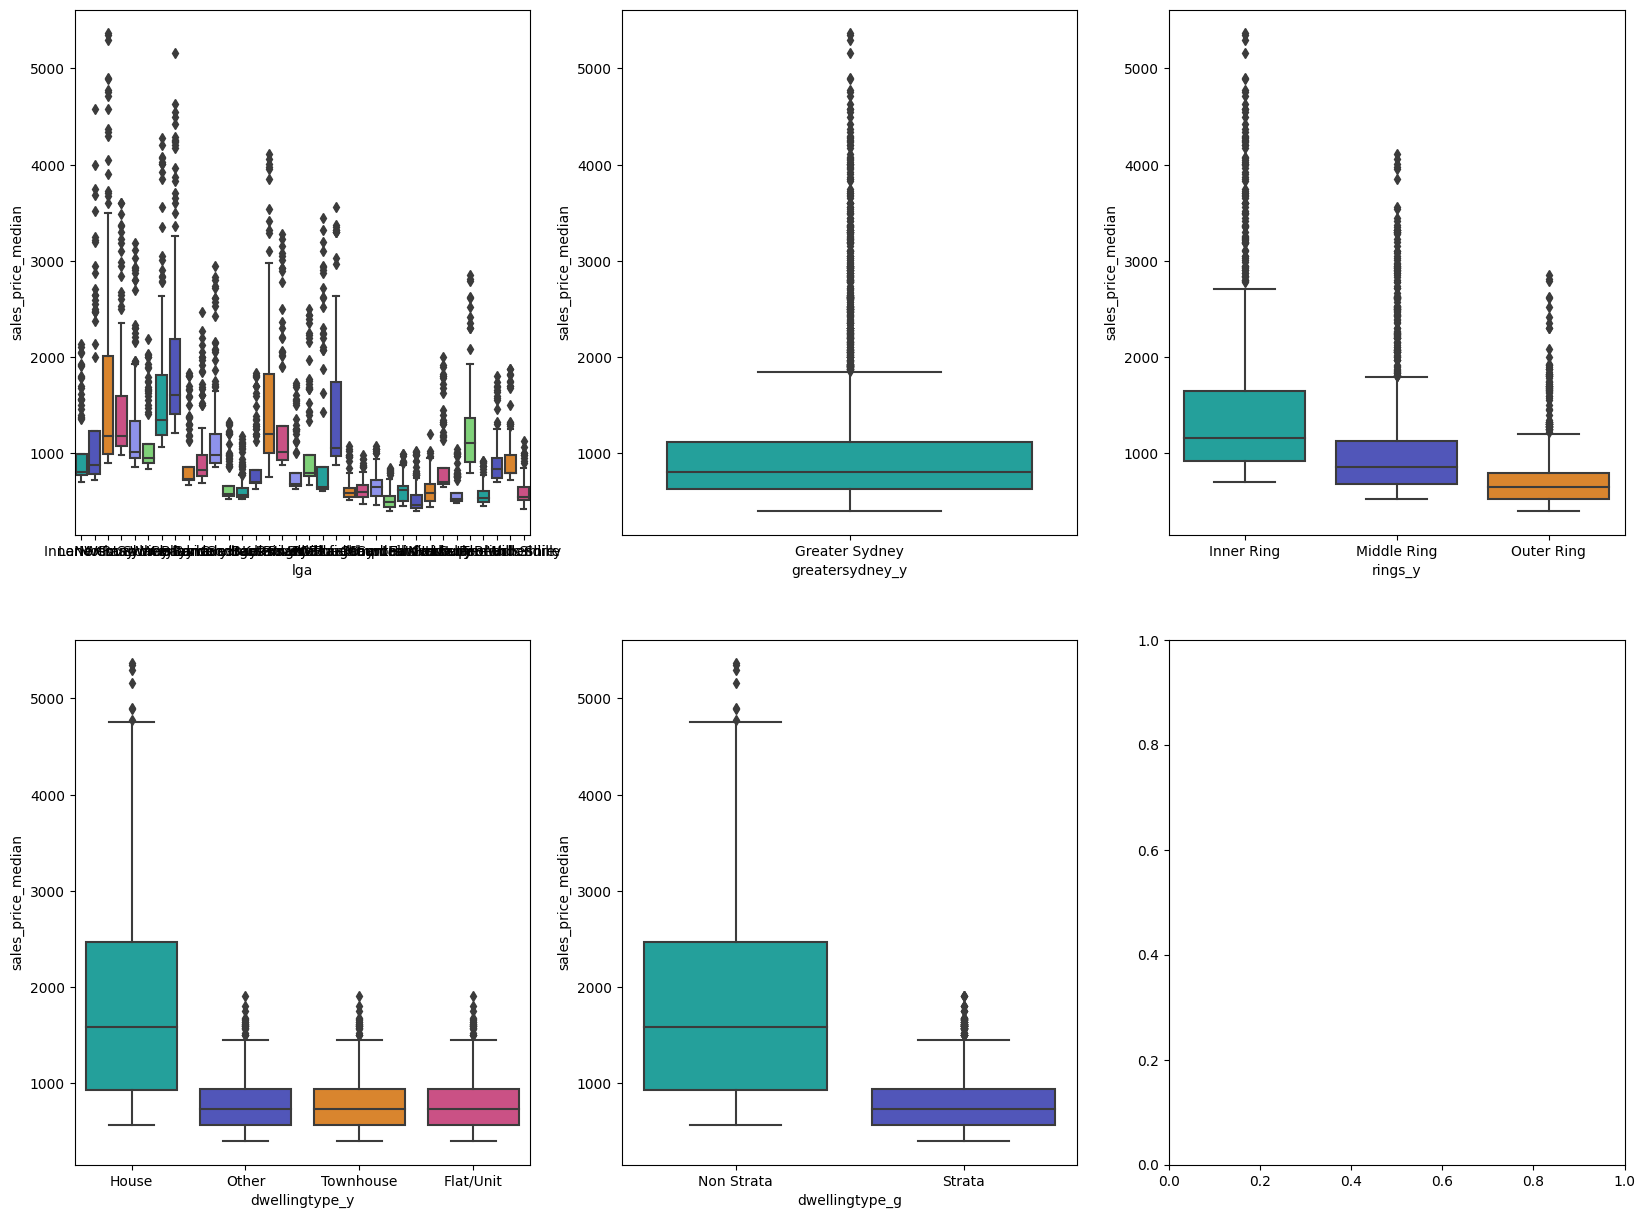

In [ ]:
f,ax = plt.subplots(2, 3, figsize=(20,15))
for i,ax in zip(categorical, ax.reshape(-1)):
  sns.boxplot(x=i, y='sales_price_median', data=final_data, ax=ax, palette=colors)
plt.show()

> House prices show a decline with increasing distance from the center of Sydney, with the Inner Ring recording the highest median house price, followed by the Middle Ring and then the Outer Ring. The gap between the Inner Ring and Middle Ring appears more pronounced than the gap between the Middle Ring and Outer Ring. Notably, there is a substantial gap between Non Strata and Strata houses, with median house prices in Greater Sydney exceeding 1.5M for the former and ranging between 700-800k for the latter.

The above numbers may not align with the recently published median house price in Sydney for 2023, as they are calculated from sales data spanning the entire 5-year period. In order to present a more accurate depiction, we will delve into the trend over these 5 years.


First, let's examine the overall trend of Greater Sydney.

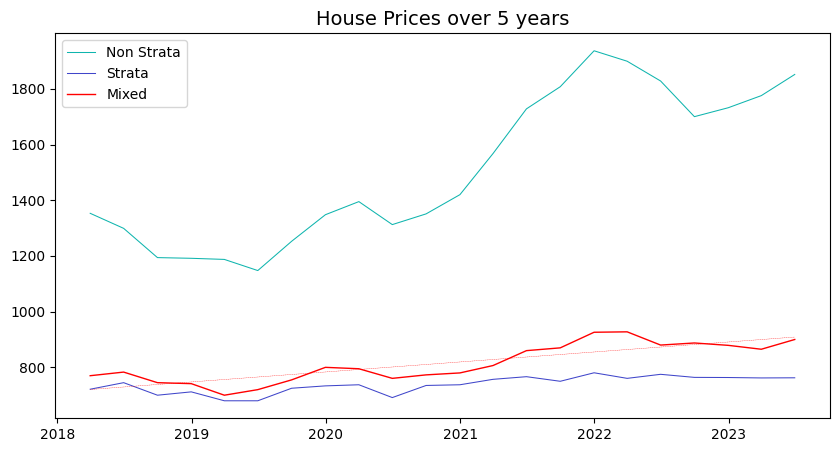

In [ ]:
price_syd = final_data.groupby(['date']).sales_price_median.median().reset_index()
price_nstrata = final_data[(final_data['dwellingtype_g'] == 'Non Strata')]
price_strata = final_data[(final_data['dwellingtype_g'] == 'Strata')]
price_nstrata_syd =  price_nstrata.groupby(['date']).sales_price_median.median().reset_index()
price_strata_syd = price_strata.groupby(['date']).sales_price_median.median().reset_index()

# draw line chart
plt.figure(figsize=(10,5))
plt.plot('date', 'sales_price_median', data = price_nstrata_syd, marker='', color=colors[0], linewidth=0.75, label = 'Non Strata')
plt.plot('date', 'sales_price_median', data = price_strata_syd, marker='', color=colors[1], linewidth=0.75, label = 'Strata')
plt.plot('date', 'sales_price_median', data = price_syd, marker='', color='red', linewidth=1.0, label = 'Mixed')

# add regression line
price_syd['date2'] = price_syd['date']
price_syd['date2'] =  mdates.date2num(price_syd['date2']) #convert date to numeric
coefficients_sydney = np.polyfit(price_syd['date2'], price_syd['sales_price_median'], 1)
p_sydney = np.poly1d(coefficients_sydney)
plt.plot(price_syd['date2'], p_sydney(price_syd['date2']), color = 'red', linestyle='dashed', linewidth = '0.25')

# show graph
plt.legend()
plt.title("House Prices over 5 years", fontsize=14)
plt.show()

> Non-strata houses show a significant increase in value, whereas Strata houses show slight growth or maintain relatively stable prices over the analyzed period.

Then we go into the details of Non-strata houses pricing.

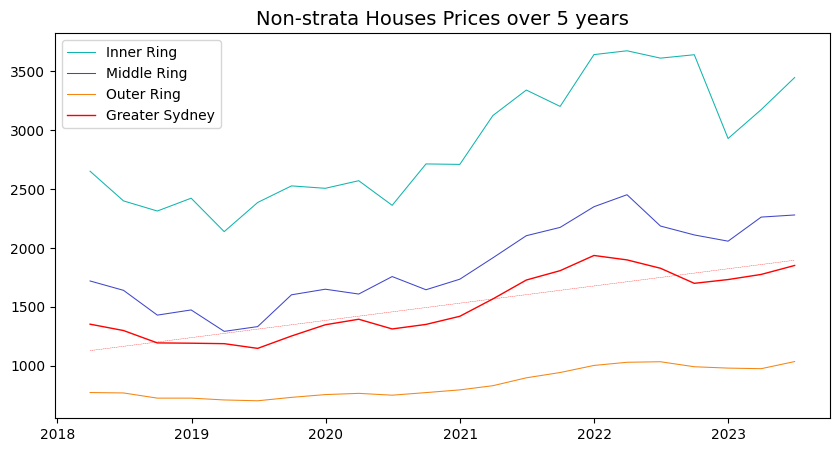

In [ ]:
price_nstrata_by_ring = price_nstrata.groupby(['rings_y', 'date', 'year']).sales_price_median.median().reset_index()
price_nstrata_syd = price_nstrata.groupby(['greatersydney_y', 'date', 'year']).sales_price_median.median().reset_index()

# draw line chart
i=0
f,ax = plt.subplots(figsize=(10,5))
for ring in price_nstrata_by_ring['rings_y'].unique():
  price_ring = price_nstrata_by_ring[price_nstrata_by_ring['rings_y'] == ring]
  plt.plot('date', 'sales_price_median', data = price_ring, marker='', color=colors[i], linewidth=0.75, label = ring)
  i = i+1
plt.plot('date', 'sales_price_median', data = price_nstrata_syd, marker='', color='red', linewidth=1.0, label = 'Greater Sydney')

# add regression line
price_nstrata_syd['date2'] = price_nstrata_syd['date']
price_nstrata_syd['date2'] =  mdates.date2num(price_nstrata_syd['date2']) #convert date to numeric
coefficients_sydney = np.polyfit(price_nstrata_syd['date2'], price_nstrata_syd['sales_price_median'], 1)
p_sydney = np.poly1d(coefficients_sydney)
plt.plot(price_nstrata_syd['date2'], p_sydney(price_nstrata_syd['date2']), color = 'red', linestyle='dashed', linewidth = '0.25')

# show graph
plt.legend()
plt.title("Non-strata Houses Prices over 5 years", fontsize=14)
plt.show()

> In general, Greater Sydney's house prices show an upward trend, with fluctuations in the Inner and Middle rings during early 2019 due to the initial impact of COVID-19. Subsequently, prices rebounded sharply, and despite a dip during the second wave of COVID, they surged even higher, possibly reflecting increased market adaptability to uncertainties. Peak prices were recorded in June 2022, followed by a subsequent decline.

> Combing with the "House sales number" chart, a notable shift occurred around March 2022, where reducing FOMO (fear of missing out) led to a sharp decrease in sales volume, indicating a more cautious market. However, persistent demand from some buyers, willing to enter the market at any cost, contributed to the peak prices until June 2022. Post that period, both house prices and sales numbers have been fluctuated at the similar trend, meaning it is going to increase slightly now.

> The house prices in the Middle ring closely align with the overall trend observed in Greater Sydney. In contrast, the Inner ring displays significant fluctuations. However, We will analyze percentage fluctuations to assess the capital gains for each ring as the the Inner Ring initialised at a high starting price than others.

In [ ]:
# Write a function to draw a waterfall chart based on 2 columns of a dataframe
def draw_waterfall_chart(x_axis, y_axis, base_value, title):
  x_value = pd.Series(x_axis)
  y_value = pd.Series(y_axis.pct_change())
  y_value.replace(to_replace = y_value.iloc[0], value = 0, inplace = True) #first value of waterfall chart start from 0 because it compares to itself
  measure_value = ['absolute']
  for i in range(1, (x_value.size - 1)):
      measure_value.append('relative')
  measure_value.append('total')
  fig = go.Figure(go.Waterfall(
    # name = "1",
    orientation = "v",
    measure = measure_value,
    x = x_value,
    textposition = "outside",
    y = y_value, base = base_value,
    connector = {"line":{"color":"rgb(63, 63, 63)"}}
    ))
  fig.update_layout (
        title = title
        )
  fig.show()
# greater sydney
draw_waterfall_chart(price_nstrata_syd.date, price_nstrata_syd.sales_price_median, 0, 'Non Strata House Prices of Greater Sydney')
# rings
for ring in price_nstrata_by_ring['rings_y'].unique():
  price_ring = price_nstrata_by_ring[price_nstrata_by_ring['rings_y'] == ring]
  draw_waterfall_chart(price_ring.date, price_ring.sales_price_median, 0, ring)

> The Inner Ring shows big gaps in its trend, followed by the Middle Ring with a 20% gap in September 2019, following the initial downturn during the first wave of COVID-19. Meanwhile, the Outer Ring demonstrates a continuous slight increase from September 2019 to June 2022, indicating a consistently hot market.
- During the analysis period, the Outer Ring emerged as a dynamic market, attributed to factors such as its affordability – having the lowest prices in Greater Sydney – and the growing trend of relocating to regional areas amidst the COVID-19 pandemic, drawing increased attention to these quieter regions.

> Over a span of five years, the Middle Ring realised the highest capital gain at 34.6%, followed by the Inner Ring at 26.4%, and the Outer Ring at 24.6%.

Let's find LGAs that showed big gaps (over 20%) over a span of 5 years in their Non Strata house prices.

In [ ]:
list_lga = []
for lga in price_nstrata.lga.unique():
  temp = price_nstrata.copy()
  price_lga = temp[temp['lga'] == lga]
  price_lga['change'] = price_lga.sort_values(['date']).sales_price_median.pct_change()
  list_lga.append(price_lga)
price_nstrata = pd.concat(list_lga, axis = 0, join = 'outer')
price_nstrata.change.fillna(0, inplace=True)

increase_more_20 = price_nstrata[price_nstrata['change'] >= 0.2].groupby(['rings_y','lga']).sales_price_median.count().reset_index()
descrease_more_20 = price_nstrata[price_nstrata['change'] <= -0.2].groupby(['rings_y','lga']).sales_price_median.count().reset_index()
list_lga = list(set(increase_more_20.lga) & set(descrease_more_20.lga))
print("List of LGAs had at least 20% gap during the period: ", list_lga)

List of LGAs had at least 20% gap during the period:  ['Strathfield', 'Burwood', 'Hunters Hill']


<ipython-input-78-9c85e4b274fd>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-9c85e4b274fd>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-9c85e4b274fd>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-9c85e4b

> Hence, Burwood, Strathfield and Hunters Hill experienced significant gaps over five years, with quarterly fluctuations exceeding 20%, indicating increases or decreases.

Now we look at the details of these LGAs.

In [ ]:
strathfield = price_nstrata[price_nstrata['lga'] == 'Strathfield']
strathfield[['date','sales_price_median', 'change', 'sales_no']]

,date,sales_price_median,change,sales_no
72,2018-03-31,2520.0,0.000000,20.0
208,2018-06-30,1880.0,-0.253968,20.0
344,2018-09-30,1425.0,-0.242021,20.0
480,2018-12-31,1625.0,0.140351,36.0
616,2019-03-31,2250.0,0.384615,20.0
752,2019-06-30,2100.0,-0.066667,36.0
885,2019-09-30,2243.0,0.068095,36.0
1021,2019-12-31,2070.0,-0.077129,42.0
1157,2020-03-31,2078.0,0.003865,37.0
1293,2020-06-30,2305.0,0.109240,20.0


In [ ]:
burwood = price_nstrata[price_nstrata['lga'] == 'Burwood']
burwood[['date','sales_price_median', 'change', 'sales_no']]

,date,sales_price_median,change,sales_no
36,2018-03-31,1665.0,0.000000,20.0
172,2018-06-30,1608.0,-0.034234,32.0
308,2018-09-30,1500.0,-0.067164,35.0
444,2018-12-31,1520.0,0.013333,45.0
580,2019-03-31,1249.0,-0.178289,20.0
716,2019-06-30,1265.0,0.012810,20.0
849,2019-09-30,1685.0,0.332016,20.0
985,2019-12-31,1610.0,-0.044510,33.0
1121,2020-03-31,1500.0,-0.068323,31.0
1257,2020-06-30,1845.0,0.230000,20.0


In [ ]:
huntershill = price_nstrata[price_nstrata['lga'] == 'Hunters Hill']
huntershill[['date','sales_price_median', 'change', 'sales_no']]

,date,sales_price_median,change,sales_no
56,2018-03-31,2900.0,0.000000,20.0
192,2018-06-30,2625.0,-0.094828,20.0
328,2018-09-30,2875.0,0.095238,20.0
464,2018-12-31,2670.0,-0.071304,20.0
600,2019-03-31,2500.0,-0.063670,20.0
736,2019-06-30,2534.0,0.013600,20.0
869,2019-09-30,2620.0,0.033938,20.0
1005,2019-12-31,2780.0,0.061069,32.0
1141,2020-03-31,3540.0,0.273381,20.0
1277,2020-06-30,2425.0,-0.314972,20.0


> Burwood and Strathfield show some increases of over 30%, yet a closer look at the sales median price reveals a normal restoration of previous values. Despite this, they remain attractive areas, with a dynamic market where fluctuations prompt swift market reentries, recovering or surpassing previous prices.

> As for Hunters Hill, characterised as primarily residential with limited commercial or industrial land use, the sales data with a count of 20 (actual it is from 10 to 30) suggests fluctuations without accurately reflecting the area's true pricing. However, from late 2021 to early 2022, Hunters Hill experienced a notable surge in house prices.

Although those above LGAs have big gaps, have they shown strong capital gain over 5 years?
Let's select Mar 2019 (initialtion of Covid-19 outbreak) and Jun 2022 (peak of house prices at most LGAs) as the consider points, we will see how much change through two periods for each LGA.


In [ ]:
pivot_lga = pd.pivot_table(price_nstrata, values='sales_price_median', index='lga', columns='date', aggfunc=np.median)
p_20182019 = pivot_lga.copy()
p_20182019['2018_2019'] = (p_20182019['2019-03-31 00:00:00'] - p_20182019['2018-03-31 00:00:00'])/p_20182019['2018-03-31 00:00:00']
print('Top 5 LGAs significant drop when Covid19 hit \n')
most_drop_whenCovid = p_20182019.reset_index()[['lga' ,'2018_2019']].sort_values(['2018_2019'],ascending = True).head(5)
print(most_drop_whenCovid, '\n')
p_20192022 = pivot_lga.copy()
p_20192022['2019_2022'] = (p_20192022['2022-06-30 00:00:00'] - p_20192022['2019-03-31 00:00:00'])/p_20192022['2019-03-31 00:00:00']
print('Top 5 LGAs significant rise during Covid outbreak \n')
most_soared_afterCovid = p_20192022.reset_index()[['lga', '2019_2022']].sort_values(['2019_2022'], ascending = False).head(10)
print(most_soared_afterCovid, '\n')
p_20222023 = pivot_lga.copy()
p_20222023['2022_2023'] = (p_20222023['2023-06-30 00:00:00'] - p_20222023['2022-06-30 00:00:00'])/p_20222023['2022-06-30 00:00:00']
print('Top 5 LGAs significant drop since the high peak in June 2022 \n')
most_drop_afterPeak = p_20222023.reset_index()[['lga', '2022_2023']].sort_values(['2022_2023'], ascending = True).head(10)
print(most_drop_afterPeak)

Top 5 LGAs significant drop when Covid19 hit 

date         lga  2018_2019
17     Lane Cove  -0.260355
3        Burwood  -0.249850
25          Ryde  -0.247887
6     Canada Bay  -0.216705
22    Parramatta  -0.185484 

Top 5 LGAs significant rise during Covid outbreak 

date               lga  2019_2022
17           Lane Cove   1.000000
25                Ryde   0.796255
6           Canada Bay   0.658768
21    Northern Beaches   0.637500
27    Sutherland Shire   0.619048
29     The Hills Shire   0.617908
8        Central Coast   0.606452
12          Hawkesbury   0.600000
22          Parramatta   0.595050
0              Bayside   0.581722 

Top 5 LGAs significant drop since the high peak in June 2022 

date             lga  2022_2023
12        Hawkesbury  -0.208333
33         Woollahra  -0.179090
14      Hunters Hill  -0.158228
17         Lane Cove  -0.120000
2     Blue Mountains  -0.083156
0            Bayside  -0.080556
8      Central Coast  -0.076305
6         Canada Bay  -0.066786
19  

Let's check the sales number of these LGAs

In [ ]:
mentioned_lgas = most_drop_whenCovid.lga.unique().tolist() + most_soared_afterCovid.lga.unique().tolist() + most_drop_afterPeak.lga.unique().tolist()
pivot_lga_no = pd.pivot_table(price_nstrata[(price_nstrata['date'] >= '2019-03-31 00:00:00') & (price_nstrata['date'] <= '2022-06-30 00:00:00')], values='sales_no', index='lga', columns='date', aggfunc=np.sum, margins=True, margins_name='Total')
pivot_lga_no = pivot_lga_no['Total'].reset_index()
pivot_lga_no = pivot_lga_no.drop(pivot_lga_no.tail(1).index)
pivot_lga_no[pivot_lga_no['lga'].isin(mentioned_lgas)].sort_values(['Total'], ascending = False)

,lga,Total
8,Central Coast,17749.0
21,Northern Beaches,7776.0
29,The Hills Shire,6952.0
27,Sutherland Shire,6780.0
22,Parramatta,4780.0
2,Blue Mountains,4688.0
12,Hawkesbury,2968.0
0,Bayside,2726.0
25,Ryde,2421.0
24,Randwick,2310.0


> The real estate market was hot observed in Central Coast, Northern Beaches, The Hills Shire, Sutherland Shire, Parramatta, and Blue Mountains, recording a robust monthly sales volume exceeding 110 properties. Conversely, other LGAs on the list are seen as more "settlement", presenting challenges in buying houses even amidst rising house prices due to limited selling.

> Examining the fluctuations from the peak in house prices, LGAs like Lane Cove, Canada Bay, Hawkesbury, and Bayside display varying trends of both increases and decreases. However, Lane Cove and Canada Bay have a lower sales number; therefore, prospective buyers can consider Central Coast, Hawkesbury, and Bayside as potential entry points, offering future profit potential.

> Despite the far distance of Central Coast and Hawkesbury from Sydney Central, their appeal signifies a "regional renaissance" post-COVID, reflecting a shift in moving towards more remote areas. This trend, coupled with continous percentage increases in housing prices in Outer Ring in general, underlines the resilience and attractiveness of these regions.

> Furthermore, LGAs such as Ryde, Northern Beaches, Sutherland Shire, The Hills Shire, and Parramatta seem to be mature and stable markets, characterised by minimal fluctuations in house prices. This stability positions them as hotspots in the real estate landscape, indicating sustained growth and reliability for potential investors.>

### **Rent**

We already know the trend of sales number above, now we look at the trend of new rental lodge.

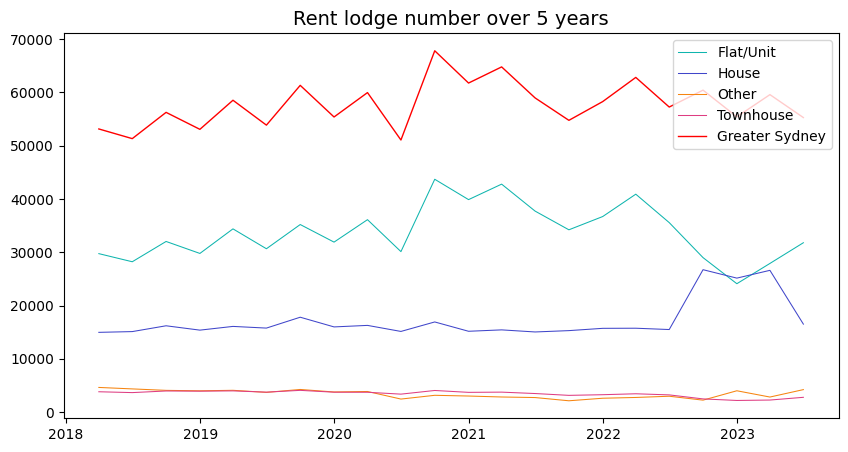

In [ ]:
# Compare rent no across Sydney of different dwelling types
rent_no_syd = final_data.groupby(['date', 'year']).new_bonds_no.sum().reset_index()
rent_no_type_syd = final_data.groupby(['date', 'year', 'dwellingtype_y']).new_bonds_no.sum().reset_index()

# draw line chart
i = 0
f,ax = plt.subplots(figsize=(10,5))
for dwtype in rent_no_type_syd['dwellingtype_y'].unique():
  rent = rent_no_type_syd[rent_no_type_syd['dwellingtype_y'] == dwtype]
  plt.plot('date', 'new_bonds_no', data = rent, marker='', color=colors[i], linewidth=0.75, label = dwtype)
  i = i + 1

plt.plot('date', 'new_bonds_no', data = rent_no_syd, marker='', color='red', linewidth=1.0, label = 'Greater Sydney')

# show graph
plt.legend()
plt.title("Rent lodge number over 5 years", fontsize=14)
plt.show()

> Over the past five years, the number of newly lodged bonds each quarter fluctuated but did not show a strong surge. During this period, flats/units have consistently dominated, with a substantial number of new rental bonds each quarter, followed by houses.

> Following the second wave of COVID-19, there was a more pronounced increase in the number of flats/units, possibly indicative of a trend of reducing household sizes.

> Notably, the number of house rental experienced a significant upward starting from Sep 2022, with a surge of 10K. Concurrently, the ABS data on net overseas migration recorded a sharp increase during this period (refer to https://www.abs.gov.au/statistics/people/population/overseas-migration/latest-release).

> Also, the data shows that there is no correlation between sales numbers and new bonds (as the sales number has droped continuosly since Mar 2022 after a period of increasing), that contrasts with the findings outlined in the Data Preparation section.

Next, let's check the total live rental every quarter for each delling type to better understand the rental market.

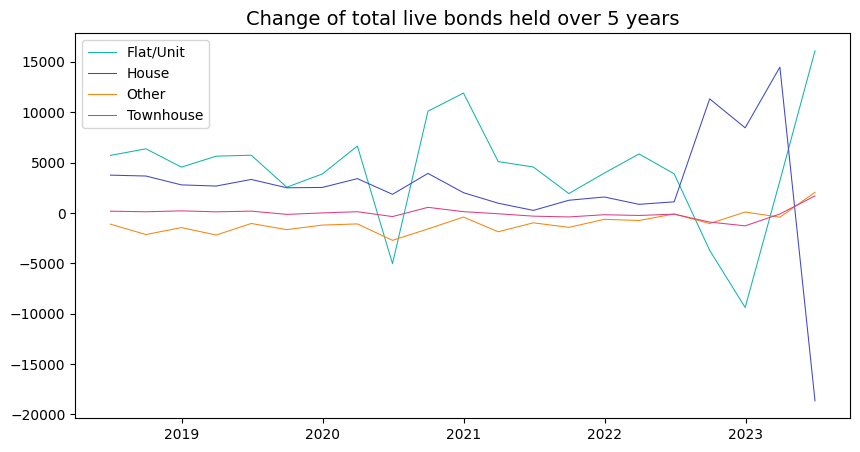

In [ ]:
# calculate the different among rows after group by dwelling types, de biet xenm so bonds that te tang giam ra sao
rent_total_bonds = final_data.groupby(['date', 'dwellingtype_y']).total_bonds_held.sum().reset_index()

# draw line chart
i = 0
f,ax = plt.subplots(figsize=(10,5))
for dwtype in rent_total_bonds['dwellingtype_y'].unique():
  total_bonds = rent_total_bonds[rent_total_bonds['dwellingtype_y'] == dwtype].sort_values(['date'])
  total_bonds['change'] = total_bonds.total_bonds_held.diff()
  plt.plot('date', 'change', data = total_bonds, marker='', color=colors[i], linewidth=0.75, label = dwtype)
  i = i + 1

# show graph
plt.legend()
plt.title("Change of total live bonds held over 5 years", fontsize=14)
plt.show()


> This chart strengthens the insight of a reduction in household size post-COVID, as the total number of flat/unit rentals in NSW increased following the impact of the pandemic.

> The total number of houses for rent experienced a slight decline after the initial wave of COVID, possibly due to delays in new construction projects or a surge in house purchases facilitated by government policies during the pandemic, such as low-interest rates. The continuous increase in sales numbers alongside a decreasing quarterly total of houses for rent suggests that landlords took back rental properties for selling purposes, or tenants transitioned to homeownership. This shift is supported by the observation that paying mortgage is significantly more economical than paying rental during low-interest period.

> In June 2022, amid a freeze sales market, the rental market witnessed an increase, with immigration policies considered as a contributing factor.

> June 2023 marked a significant crisis, as the total number of houses for rent sharply decreased, creating a gap more than double the preceding increase. This underscores that many previously rented houses were reclaimed. Several factors may account for this:
- A sharp increase in net migration (73% increase in 2022-2023 compared to previous periods).
- Landlords passing on mortgage-related stress to tenants, prompting them to explore homeownership options as the sales market recovered.
- Delays in the commencement of new housing projects.

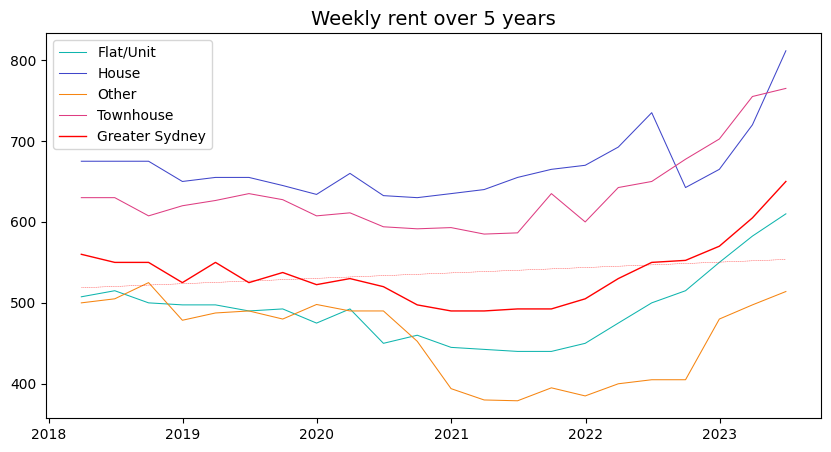

In [ ]:
# Compare rent across Sydney of different dwelling types
rent_syd = final_data.groupby(['date', 'year']).wrent_median.median().reset_index()
rent_type_syd = final_data.groupby(['date', 'year', 'dwellingtype_y']).wrent_median.median().reset_index()

# draw line chart
i = 0
f,ax = plt.subplots(figsize=(10,5))
for dwtype in rent_type_syd['dwellingtype_y'].unique():
  rent = rent_type_syd[rent_type_syd['dwellingtype_y'] == dwtype]
  plt.plot('date', 'wrent_median', data = rent, marker='', color=colors[i], linewidth=0.75, label = dwtype)
  i = i+1
# Greater Sydney
plt.plot('date', 'wrent_median', data = rent_syd, marker='', color='red', linewidth=1.0, label = 'Greater Sydney')

# add regression line
rent_syd['date2'] = rent_syd['date']
rent_syd['date2'] =  mdates.date2num(rent_syd['date2']) #convert date to numeric
coefficients_sydney = np.polyfit(rent_syd['date2'], rent_syd['wrent_median'], 1)
p_sydney = np.poly1d(coefficients_sydney)
plt.plot(rent_syd['date2'], p_sydney(rent_syd['date2']), color = 'red', linestyle='dashed', linewidth = '0.25')

# show graph
plt.legend()
plt.title("Weekly rent over 5 years", fontsize=14)
plt.show()

> In general, rent has experienced a slight increase over the past 5 years, although it shows a minor decline in the middle of 2020. A significant drop occurred in September 2022, particularly with houses, followed by a substantial increase since that time, resulting in a rental crisis across Sydney. We anticipate an adjustment in the rental market, with a potential slight decrease in rent in the future.

> Flat/Unit/Townhouse is considered a viable option due to its affordability for small families. However, as a considerable number of individuals seek downsizing and explore other cost-effective rental alternatives, townhouse rentals have approached parity with house rentals.

> With the sharp decrease in total live rental bonds, weekly rent has surged significantly due to limited rental availability.


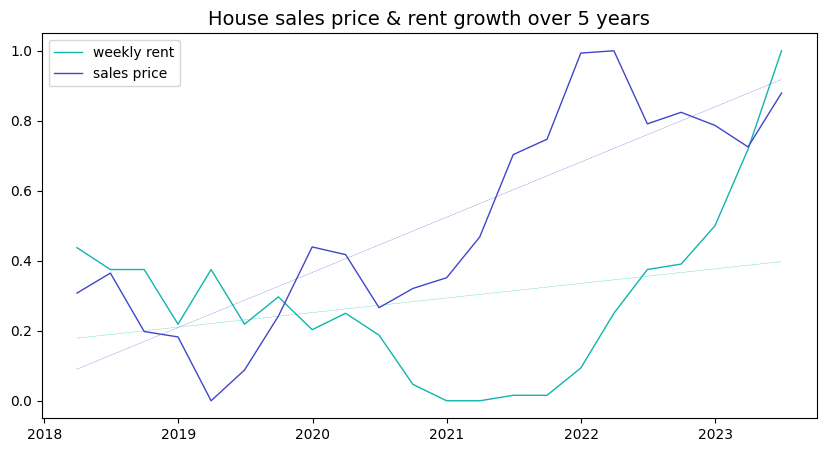

In [ ]:
rent_min = rent_syd['wrent_median'].min()
rent_max = rent_syd['wrent_median'].max()
rent_syd['scaled_rent'] = (rent_syd['wrent_median'] - rent_min) / (rent_max - rent_min)

price_min = price_syd['sales_price_median'].min()
price_max = price_syd['sales_price_median'].max()
price_syd['scaled_price'] = (price_syd['sales_price_median'] - price_min) / (price_max - price_min)

plt.figure(figsize=(10,5))
plt.plot('date', 'scaled_rent', data = rent_syd, marker='', color=colors[0], linewidth=1.0, label = 'weekly rent')


coefficients_sydney = np.polyfit(rent_syd['date2'], rent_syd['scaled_rent'], 1)
p_sydney = np.poly1d(coefficients_sydney)
plt.plot(rent_syd['date2'], p_sydney(rent_syd['date2']), color = colors[0], linestyle='dashed', linewidth = '0.25')

price_syd['date2'] = price_syd['date']
price_syd['date2'] =  mdates.date2num(price_syd['date2']) #convert date to numeric
coefficients_sydney = np.polyfit(price_syd['date2'], price_syd['scaled_price'], 1)
p_sydney = np.poly1d(coefficients_sydney)
plt.plot(price_syd['date2'], p_sydney(price_syd['date2']), color = colors[1], linestyle='dashed', linewidth = '0.25')

plt.plot('date', 'scaled_price', data = price_syd, marker='', color=colors[1], linewidth=1.0, label = 'sales price')
plt.legend()
plt.title("House sales price & rent growth over 5 years", fontsize=14)
plt.show()

> Although rental and house prices both increase over time, the rate of increase in house prices is much faster than that of rental.

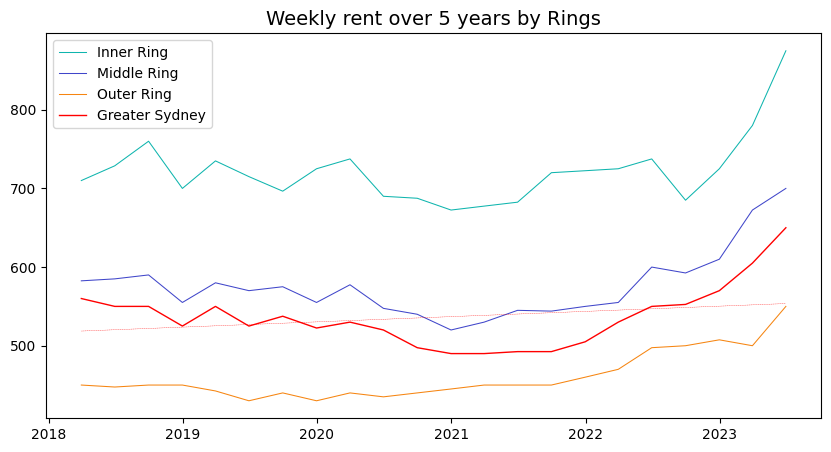

In [ ]:
rent_nstrata = final_data[(final_data['dwellingtype_g'] == 'Non Strata')]

rent_syd_by_ring = final_data.groupby(['rings_y', 'date']).wrent_median.median().reset_index()

# draw line chart
i = 0
f,ax = plt.subplots(figsize=(10,5))
for ring in rent_syd_by_ring['rings_y'].unique():
  rent_ring = rent_syd_by_ring[rent_syd_by_ring['rings_y'] == ring]
  plt.plot('date', 'wrent_median', data = rent_ring, marker='', linewidth=0.75, label = ring, color=colors[i])
  i = i+1
plt.plot('date', 'wrent_median', data = rent_syd, marker='', color='red', linewidth=1.0, label = 'Greater Sydney')

# add regression line
coefficients_sydney = np.polyfit(rent_syd['date2'], rent_syd['wrent_median'], 1)
p_sydney = np.poly1d(coefficients_sydney)
plt.plot(rent_syd['date2'], p_sydney(rent_syd['date2']), color = 'red', linestyle='dashed', linewidth = '0.25')

# show graph
plt.legend()
plt.title("Weekly rent over 5 years by Rings", fontsize=14)
plt.show()

> Similar to house prices, the Inner Ring remains an area experiencing a more pronounced increase in rent compared to other areas. Rent prices remained relatively stable in the period leading up to December 2022 when the rental crisis occurred.

Let check popular rental range of each ring, and top 5 LGAs that have the highest rental of each ring.

Inner Ring 
 count      32.000000
mean      898.281250
std       354.424316
min       360.000000
25%       600.000000
50%       875.000000
75%      1100.000000
max      1850.000000
Name: wrent_median, dtype: float64 

Middle Ring 
 count      48.000000
mean      727.208333
std       173.051703
min       450.000000
25%       627.500000
50%       700.000000
75%       800.000000
max      1213.000000
Name: wrent_median, dtype: float64 

Outer Ring 
 count      56.000000
mean      564.642857
std       166.918208
min       380.000000
25%       445.000000
50%       550.000000
75%       601.250000
max      1250.000000
Name: wrent_median, dtype: float64 



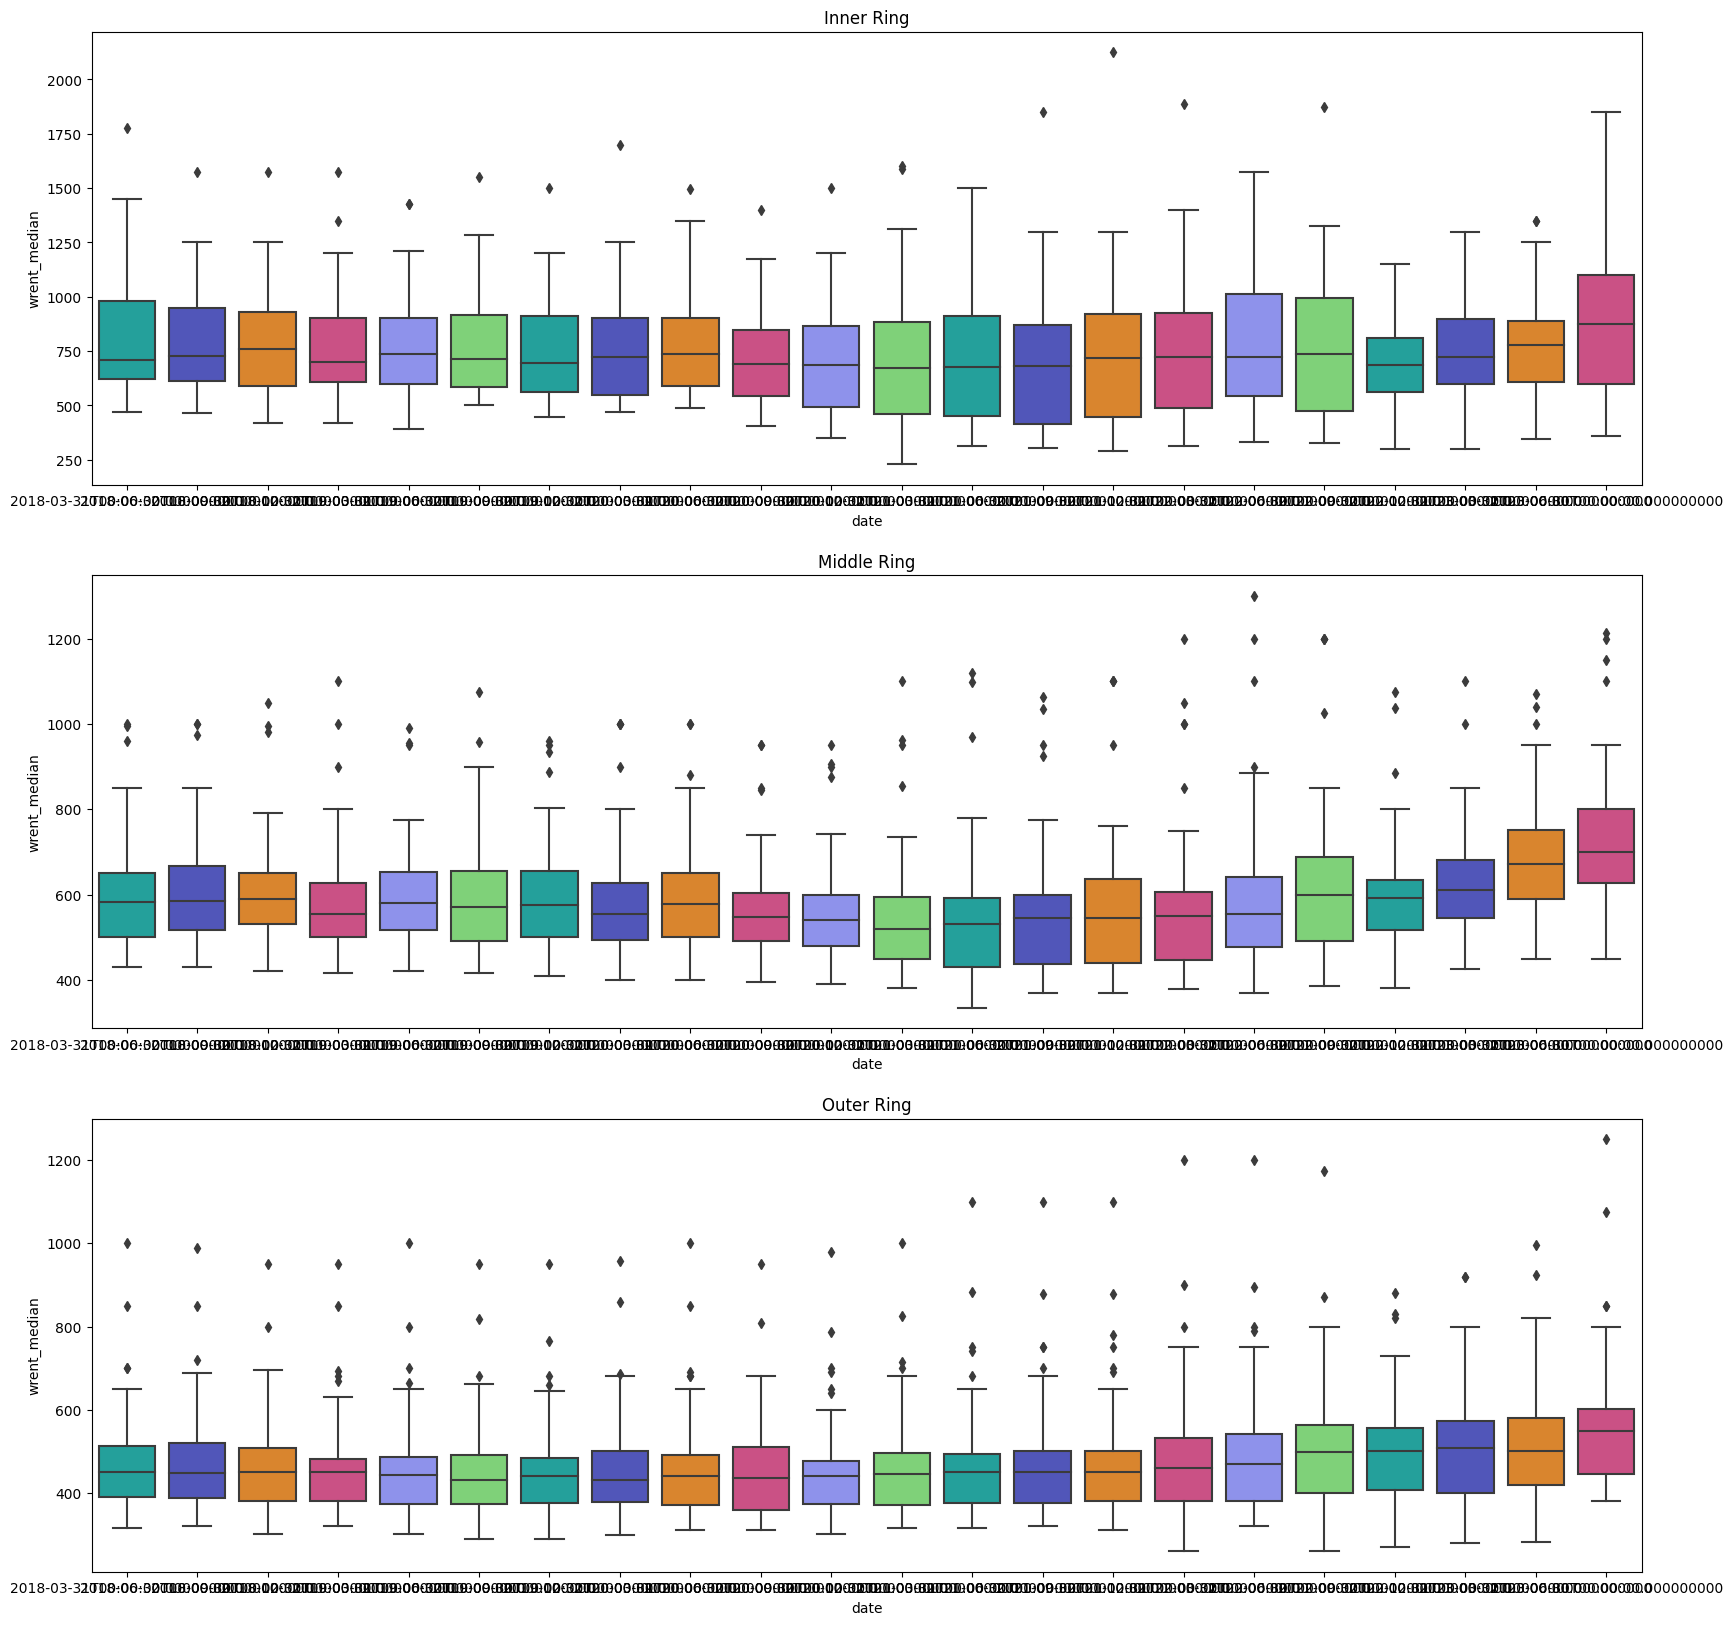

In [ ]:
rings = list(final_data['rings_y'].unique())
f,ax = plt.subplots(3, 1, figsize=(20,20))
for i,ax in zip(rings, ax.reshape(-1)):
  draw_data = final_data[final_data['rings_y'] == i].sort_values(['date'], ascending = True)
  print(i, "\n", draw_data[draw_data['date'] == '2023-06-30'].wrent_median.describe(), "\n")
  sns.boxplot(x='date', y='wrent_median', data=draw_data, ax=ax, palette=colors).set(title=i)

> In the Inner Ring, house prices are generally standardised, with few exceeding values. The majority of prices fall within the concentrated range of 600 to 1100. Over the course of 5 years, houses with excessively high prices tend to adjust to align with the overall price trend, typically hovering around 1000.

> The Middle and Outer Rings shows numerous exceeding values, but prices vary between 627 and 800 for the Middle Ring and 445 to 600 for the Outer Ring.

In [ ]:
rent_by_lga = final_data.groupby(['lga', 'date']).wrent_median.median().reset_index()
rent_pivot_lga = pd.pivot_table(rent_by_lga, values='wrent_median', index='lga', columns='date', aggfunc=np.median)
p_20222023 = pivot_lga.copy()
p_20222023['2022_2023'] = (p_20222023['2023-06-30 00:00:00'] - p_20222023['2022-06-30 00:00:00'])/p_20222023['2022-06-30 00:00:00']
print('Top 5 LGAs significant drop from 2022 - 2023 \n')
print(p_20222023.reset_index()[['lga' ,'2022_2023']].sort_values(['2022_2023'],ascending = True).head(5), '\n')

print('Top 5 LGAs significant surge from 2022 - 2023 hit \n')
print(p_20222023.reset_index()[['lga' ,'2022_2023']].sort_values(['2022_2023'],ascending = False).head(5), '\n')

Top 5 LGAs significant drop from 2022 - 2023 

date             lga  2022_2023
12        Hawkesbury  -0.208333
33         Woollahra  -0.179090
14      Hunters Hill  -0.158228
17         Lane Cove  -0.120000
2     Blue Mountains  -0.083156 

Top 5 LGAs significant surge from 2022 - 2023 hit 

date          lga  2022_2023
26    Strathfield   0.139706
3         Burwood   0.077468
32    Wollondilly   0.070000
22     Parramatta   0.060832
1       Blacktown   0.058824 



> Thus, LGAs experiencing increased rents are busy areas, situated in proximity to Sydney, and have multiple train lines crossed into. On the other hand, LGAs witnessing declining rents are regional areas located far from Sydney. This trend indicates a decrease in the regional migration wave post-COVID, with individuals opting to return to the city for residence and employment.

## **IV. Recommendations for further analysis**

In this analysis, a few points remain hypotheses without specific verification:

- The trend of reducing household sizes after Covid
- The migration trend to regional areas during Covid
- The trend of transitioning from tenancy to homeownership (i.e., purchasing a house to live in instead of investing), resulting in a significant decrease in the number of rental houses.

To further develop this analysis, additional data on population, households, and homeownership is essential to either back up or disprove the above assumptions.